In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [2]:
# First, calculate the general amino acid frequencies on the surface

aa_dict_surf = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
n_resi = 0

for file in glob.glob("*_strands.fasta"):
    with open(file, 'r') as in_f:
        for line in in_f:
            if line[0] == ">":
                pass
            else:
                line = line.rstrip()
                strands = line.split(" ")
                for strand in strands:
                    if "-" in strand or "X" in strand:
                        pass
                    else:
                        for pos in range(0,len(strand),2):
                            n_resi += 1
                            aa_dict_surf[strand[pos]] = aa_dict_surf[strand[pos]] + 1

for key in aa_dict_surf:    
    aa_dict_surf[key] = aa_dict_surf[key]/n_resi

print(aa_dict_surf)



{'A': 0.11995082543027749, 'C': 0.000820144522764552, 'D': 0.0072866686445619815, 'E': 0.0021825051749243796, 'F': 0.11560627606644364, 'G': 0.06515289471799646, 'H': 0.00836513311576485, 'I': 0.08131195842327642, 'K': 0.006255946474060585, 'L': 0.17592270521516432, 'M': 0.013103556460385826, 'N': 0.007521117442649561, 'P': 0.040410447379459216, 'Q': 0.005143380359499524, 'R': 0.0076822477075170256, 'S': 0.010963678339659189, 'T': 0.02333660709109572, 'V': 0.14541878523126028, 'W': 0.0439160963166815, 'Y': 0.11964902588655747}


In [3]:
# Second, calculate the general amino acid frequencies in the core

aa_dict_core = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
n_resi = 0

for file in glob.glob("*_strands.fasta"):
    with open(file, 'r') as in_f:
        for line in in_f:
            if line[0] == ">":
                pass
            else:
                line = line.rstrip()
                strands = line.split(" ")
                for strand in strands:
                    if "-" in strand or "X" in strand:
                        pass
                    else:
                        for pos in range(1,len(strand)-1,2):
                            n_resi += 1
                            aa_dict_core[strand[pos]] = aa_dict_core[strand[pos]] + 1

for key in aa_dict_core:    
    aa_dict_core[key] = aa_dict_core[key]/n_resi

print(aa_dict_core)


{'A': 0.07307786630111489, 'C': 0.000560694380689476, 'D': 0.0529505100746824, 'E': 0.06357016644762904, 'F': 0.03465929694164796, 'G': 0.24388319111608575, 'H': 0.014590630220483895, 'I': 0.01795479650462075, 'K': 0.036906266571925035, 'L': 0.033595549658657645, 'M': 0.022868994543972065, 'N': 0.04843456224965258, 'P': 0.010193109432870735, 'Q': 0.04258971634104471, 'R': 0.07494859428154613, 'S': 0.07878122858095064, 'T': 0.06227166114356501, 'V': 0.027519089809615437, 'W': 0.0037320237189443434, 'Y': 0.056912051680301494}


In [4]:
# Third, calculate the amino acid frequencies on lipid/water boundary

aa_dict_rim = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
n_resi = 0

for file in glob.glob("*_strands.fasta"):
    with open(file, 'r') as in_f:
        for line in in_f:
            if line[0] == ">":
                pass
            else:
                line = line.rstrip()
                strands = line.split(" ")
                for strand in strands:
                    if "-" in strand or "X" in strand:
                        pass
                    else:
                        for pos in (0,-1):
                            n_resi += 1
                            aa_dict_rim[strand[pos]] = aa_dict_rim[strand[pos]] + 1

for key in aa_dict_rim:    
    aa_dict_rim[key] = aa_dict_rim[key]/n_resi

print(aa_dict_rim)


{'A': 0.05463001051236346, 'C': 0.0010215274921157274, 'D': 0.01702545820192879, 'E': 0.004451757392933863, 'F': 0.19393025275378217, 'G': 0.039732163261575026, 'H': 0.01522921522921523, 'I': 0.07771836007130124, 'K': 0.01228575346222405, 'L': 0.14535856300562183, 'M': 0.013848896201837378, 'N': 0.017461949814890992, 'P': 0.04733534439416792, 'Q': 0.010957996252113899, 'R': 0.015297774121303533, 'S': 0.017925864984688514, 'T': 0.03165592577357283, 'V': 0.10146258969788381, 'W': 0.08296083001965356, 'Y': 0.09970976735682618}


In [5]:
# Forth, calculate the amino acid frequencies of surface residues buried in the membrane

aa_dict_buried = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
n_resi = 0

for file in glob.glob("*_strands.fasta"):
    with open(file, 'r') as in_f:
        for line in in_f:
            if line[0] == ">":
                pass
            else:
                line = line.rstrip()
                strands = line.split(" ")
                for strand in strands:
                    if "-" in strand or "X" in strand:
                        pass
                    else:
                        for pos in range(2,len(strand)-2,2):
                            n_resi += 1
                            aa_dict_buried[strand[pos]] = aa_dict_buried[strand[pos]] + 1

for key in aa_dict_buried:    
    aa_dict_buried[key] = aa_dict_buried[key]/n_resi

print(aa_dict_buried)


{'A': 0.15881906595737738, 'C': 0.0007003143935685301, 'D': 0.0014917376499896653, 'E': 0.0008322182696387194, 'F': 0.06900068535622206, 'G': 0.0802791466771102, 'H': 0.004280756720298511, 'I': 0.0834502790378904, 'K': 0.002667993864430012, 'L': 0.1941094720581356, 'M': 0.012660052435190323, 'N': 0.0016059636869989013, 'P': 0.03628988392458906, 'Q': 0.0016834742121123113, 'R': 0.003150734854171426, 'S': 0.006820926209980092, 'T': 0.018386312457165235, 'V': 0.17157430675674207, 'W': 0.020683071701315232, 'Y': 0.1315136037770743}


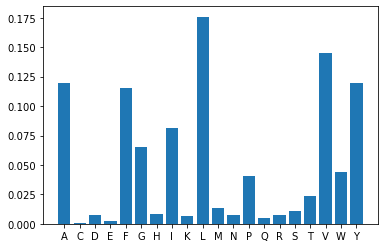

In [6]:

plt.bar(range(len(aa_dict_surf)), list(aa_dict_surf.values()))
plt.xticks(range(len(aa_dict_surf)), list(aa_dict_surf.keys()))
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
plt.show()

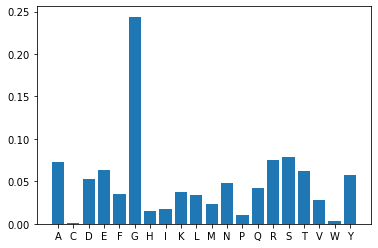

In [7]:
plt.bar(range(len(aa_dict_core)), list(aa_dict_core.values()))
plt.xticks(range(len(aa_dict_core)), list(aa_dict_core.keys()))
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
plt.show()

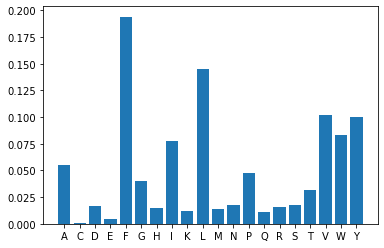

In [8]:
plt.bar(range(len(aa_dict_rim)), list(aa_dict_rim.values()))
plt.xticks(range(len(aa_dict_rim)), list(aa_dict_rim.keys()))
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
plt.show()

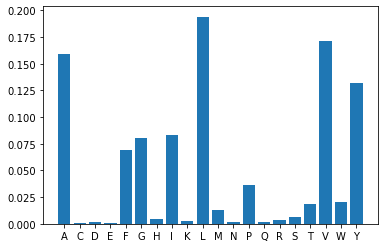

In [9]:
plt.bar(range(len(aa_dict_buried)), list(aa_dict_buried.values()))
plt.xticks(range(len(aa_dict_buried)), list(aa_dict_buried.keys()))
plt.show()

In [10]:
# Finally, get overall distributions to compare to values previously reported in litterature 

aa_dict_tot = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
n_resi = 0

for file in glob.glob("*_strands.fasta"):
    with open(file, 'r') as in_f:
        for line in in_f:
            if line[0] == ">":
                pass
            else:
                line = line.rstrip()
                strands = line.split(" ")
                for strand in strands:
                    if "-" in strand or "X" in strand:
                        pass
                    else:
                        for pos in range(0,len(strand)):
                            n_resi += 1
                            aa_dict_tot[strand[pos]] = aa_dict_tot[strand[pos]] + 1

for key in aa_dict_tot:    
    aa_dict_tot[key] = aa_dict_tot[key]/n_resi

print(aa_dict_tot)

{'A': 0.09892494045990434, 'C': 0.0007037625203442372, 'D': 0.027770177581332288, 'E': 0.029719275383167428, 'F': 0.07929574855980195, 'G': 0.1453262552782189, 'H': 0.011157715202304692, 'I': 0.05289172587768166, 'K': 0.02000481398009908, 'L': 0.11207876498844926, 'M': 0.01748405604149801, 'N': 0.02587373268683085, 'P': 0.026855803431653235, 'Q': 0.021940748555100798, 'R': 0.037856030027200865, 'S': 0.04138471504904712, 'T': 0.04080177214642398, 'V': 0.09253231337129984, 'W': 0.02589065683561668, 'Y': 0.09150699202402476}


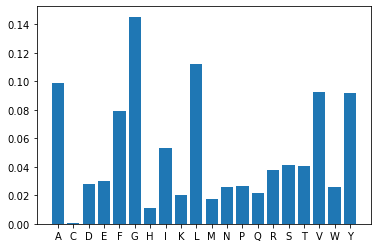

In [11]:
plt.bar(range(len(aa_dict_tot)), list(aa_dict_tot.values()))
plt.xticks(range(len(aa_dict_tot)), list(aa_dict_tot.keys()))
plt.show()

In [12]:
import itertools

id_dict = {}

with open("all_strands.fa", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        if line1[0] == ">":
            tag = line1.split()
            if tag[0] not in id_dict:
                id_dict[tag[0]] = line2.strip()
            else:
                cleaned_seq1 = id_dict[tag[0]].replace("-", "")
                cleaned_seq2 = line2.replace("-", "").strip()
                if len(cleaned_seq2) > len(cleaned_seq1):
                    id_dict[tag[0]] = line2.strip()

In [13]:
with open("all_strands_noredund.fa", "w") as out_f:
    for key in id_dict:
#        print(key)
        out_f.write(key+"\n")
        out_f.write(id_dict[key]+"\n")

In [14]:
with open("all_TM_region.fa", "w") as out_f:
    for key in id_dict:
        full_length = id_dict[key].replace("-", "")
        out_f.write(key+"\n")
        out_f.write(full_length+"\n")

In [15]:
with open("all_strands_id90_aligned.fa","w") as out_f:
    with open("all_strands.id90.fa", 'r') as in_f:
        for line in in_f:
            if line[0] == ">":
                key = line.strip()
                out_f.write(key+"\n")
                out_f.write(id_dict[key]+"\n")

In [16]:
# First, calculate the general amino acid frequencies on the surface

aa_dict_surf = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
n_resi = 0

with open("all_strands_id90_aligned.fa", 'r') as in_f:
    for line in in_f:
        if line[0] == ">":
            pass
        else:
            line = line.rstrip()
            strands = line.split(" ")
            for strand in strands:
                if "-" in strand or "X" in strand:
                    pass
                else:
                    for pos in range(0,len(strand),2):
                        n_resi += 1
                        aa_dict_surf[strand[pos]] = aa_dict_surf[strand[pos]] + 1

for key in aa_dict_surf:    
    aa_dict_surf[key] = aa_dict_surf[key]/n_resi

print(aa_dict_surf)

{'A': 0.11551798473665009, 'C': 0.0010354904207923528, 'D': 0.008912219155467279, 'E': 0.002944330413569715, 'F': 0.11631026388423144, 'G': 0.06286642910575636, 'H': 0.010634965674045304, 'I': 0.0813541708890846, 'K': 0.00766115510614698, 'L': 0.17148421521986668, 'M': 0.013481643076401505, 'N': 0.008604520044662434, 'P': 0.046143811562853534, 'Q': 0.006612767117835862, 'R': 0.0101061654057759, 'S': 0.01364194141556331, 'T': 0.025347405193666187, 'V': 0.13957563317843968, 'W': 0.04603141847447571, 'Y': 0.11173346992471506}


In [17]:
# Second, calculate the general amino acid frequencies in the core

aa_dict_core = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
n_resi = 0


with open("all_strands_id90_aligned.fa", 'r') as in_f:
    for line in in_f:
        if line[0] == ">":
            pass
        else:
            line = line.rstrip()
            strands = line.split(" ")
            for strand in strands:
                if "-" in strand or "X" in strand:
                    pass
                else:
                    for pos in range(1,len(strand)-1,2):
                        n_resi += 1
                        aa_dict_core[strand[pos]] = aa_dict_core[strand[pos]] + 1

for key in aa_dict_core:    
    aa_dict_core[key] = aa_dict_core[key]/n_resi

print(aa_dict_core)


{'A': 0.07375576727590738, 'C': 0.0008407206305630124, 'D': 0.046099890232990055, 'E': 0.06263030606288049, 'F': 0.03760027227627928, 'G': 0.24165195969048858, 'H': 0.01564010845972317, 'I': 0.01954393723220343, 'K': 0.03168367266440822, 'L': 0.03870695814653783, 'M': 0.02279412261899127, 'N': 0.04802475730671878, 'P': 0.010167535561581096, 'Q': 0.04238313870538039, 'R': 0.0718399159730158, 'S': 0.08242668487852375, 'T': 0.0642148277875073, 'V': 0.03166564112273394, 'W': 0.004873024137472474, 'Y': 0.053456759236093734}


In [18]:
# Third, calculate the amino acid frequencies on lipid/water boundary

aa_dict_rim = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
n_resi = 0

with open("all_strands_id90_aligned.fa", 'r') as in_f:
    for line in in_f:
        if line[0] == ">":
            pass
        else:
            line = line.rstrip()
            strands = line.split(" ")
            for strand in strands:
                if "-" in strand or "X" in strand:
                    pass
                else:
                    for pos in (0,-1):
                        n_resi += 1
                        aa_dict_rim[strand[pos]] = aa_dict_rim[strand[pos]] + 1

for key in aa_dict_rim:    
    aa_dict_rim[key] = aa_dict_rim[key]/n_resi

print(aa_dict_rim)


{'A': 0.053002392223758715, 'C': 0.001246580735028414, 'D': 0.019809025850147873, 'E': 0.005783730859686488, 'F': 0.18667925023468018, 'G': 0.038866065750825164, 'H': 0.018012334588325546, 'I': 0.07239757345741943, 'K': 0.01471167142756205, 'L': 0.13721977167889696, 'M': 0.014958968820340968, 'N': 0.01883497693573296, 'P': 0.04503335991359732, 'Q': 0.01370229431417872, 'R': 0.019930151103753874, 'S': 0.0218479676191822, 'T': 0.03634262296736684, 'V': 0.09842940921157553, 'W': 0.08401550403246157, 'Y': 0.0991763482754792}


In [19]:
# Forth, calculate the amino acid frequencies of surface residues buried in the membrane

aa_dict_buried = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
n_resi = 0

with open("all_strands_id90_aligned.fa", 'r') as in_f:
    for line in in_f:
        if line[0] == ">":
            pass
        else:
            line = line.rstrip()
            strands = line.split(" ")
            for strand in strands:
                if "-" in strand or "X" in strand:
                    pass
                else:
                    for pos in range(2,len(strand)-2,2):
                        n_resi += 1
                        aa_dict_buried[strand[pos]] = aa_dict_buried[strand[pos]] + 1

for key in aa_dict_buried:    
    aa_dict_buried[key] = aa_dict_buried[key]/n_resi

print(aa_dict_buried)


{'A': 0.15146432343962205, 'C': 0.0009141139189079386, 'D': 0.002646577441409651, 'E': 0.001311680924909169, 'F': 0.07584823967776759, 'G': 0.07666658928136136, 'H': 0.0063929935344577415, 'I': 0.08650419621818013, 'K': 0.003607122543500215, 'L': 0.1911862006523581, 'M': 0.012632183774623038, 'N': 0.002722028114081417, 'P': 0.04678231900544406, 'Q': 0.0025363033813509154, 'R': 0.0044573935855320435, 'S': 0.008923493017910828, 'T': 0.01902517730908078, 'V': 0.1632346283764176, 'W': 0.02419064643814786, 'Y': 0.11895378936493749}


In [18]:
# Calculate the amino acid frequencies on the cis lipid/water boundary

aa_dict_rim_cis = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
n_resi = 0

with open("all_strands_id90_aligned.fa", 'r') as in_f:
    for line in in_f:
        if line[0] == ">":
            pass
        else:
            line = line.rstrip()
            strands = line.split(" ")
            strand_num = 1
            for strand in strands:
                if "-" in strand or "X" in strand:
                    pass
                else:
                    if strand_num %2 != 0:
                        n_resi += 1
                        aa_dict_rim_cis[strand[0]] = aa_dict_rim_cis[strand[0]] + 1
                    elif strand_num %2 == 0:
                        n_resi += 1
                        aa_dict_rim_cis[strand[-1]] = aa_dict_rim_cis[strand[-1]] + 1
                strand_num += 1

for key in aa_dict_rim_cis:    
    aa_dict_rim_cis[key] = aa_dict_rim_cis[key]/n_resi

print(aa_dict_rim_cis)


{'A': 0.03314794440350859, 'C': 0.002018754226766662, 'D': 0.003118975280354493, 'E': 0.0010194708845171646, 'F': 0.2754993893268464, 'G': 0.013142090016250971, 'H': 0.010860897740004644, 'I': 0.09410422828072797, 'K': 0.006994983395746485, 'L': 0.17285583066689547, 'M': 0.015221406869820634, 'N': 0.010346115412179144, 'P': 0.05722158855770104, 'Q': 0.005006510482381323, 'R': 0.009861614397755146, 'S': 0.012970495906975806, 'T': 0.01874413299552846, 'V': 0.11151598348659042, 'W': 0.09988795914041446, 'Y': 0.04646162852903473}


In [19]:
# Calculate the amino acid frequencies on the cis lipid/water boundary

aa_dict_rim_Y = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
n_resi = 0

with open("all_strands_id90_aligned.fa", 'r') as in_f:
    for line in in_f:
        if line[0] == ">":
            pass
        else:
            line = line.rstrip()
            strands = line.split(" ")
            strand_num = 1
            for strand in strands:
                if "-" in strand or "X" in strand:
                    pass
                else:
#                    if strand_num %2 != 0:
#                        n_resi += 1
#                        aa_dict_rim_Y[strand[0]] = aa_dict_rim_Y[strand[0]] + 1
                    if strand_num %2 == 0:
                        n_resi += 1
                        aa_dict_rim_Y[strand[-3]] = aa_dict_rim_Y[strand[-3]] + 1
                strand_num += 1

for key in aa_dict_rim_Y:    
    aa_dict_rim_Y[key] = aa_dict_rim_Y[key]/n_resi

print(aa_dict_rim_Y)


{'A': 0.03715657236237361, 'C': 0.00181799611888469, 'D': 0.0006740884485752221, 'E': 0.0004698192217342457, 'F': 0.08885711367582473, 'G': 0.009743642120314575, 'H': 0.013829026657134104, 'I': 0.05184352977223981, 'K': 0.019283015013788173, 'L': 0.07709120620978449, 'M': 0.014870799714023082, 'N': 0.006965580635277296, 'P': 0.010928403635992238, 'Q': 0.006352772954754366, 'R': 0.02138698805025023, 'S': 0.00657746910427944, 'T': 0.015483607394546012, 'V': 0.07494637932795424, 'W': 0.06655091410479011, 'Y': 0.47517107547747933}


In [20]:
# Calculate the amino acid frequencies on the cis lipid/water boundary

aa_dict_rim_trans = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
n_resi = 0

with open("all_strands_id90_aligned.fa", 'r') as in_f:
    for line in in_f:
        if line[0] == ">":
            pass
        else:
            line = line.rstrip()
            strands = line.split(" ")
            strand_num = 1
            for strand in strands:
                if "-" in strand or "X" in strand:
                    pass
                else:
#                    if strand_num %2 == 0:
#                        n_resi += 1
#                        aa_dict_rim_trans[strand[0]] = aa_dict_rim_trans[strand[0]] + 1
                    if strand_num %2 != 0:
                        n_resi += 1
                        aa_dict_rim_trans[strand[-1]] = aa_dict_rim_trans[strand[-1]] + 1
                strand_num += 1

for key in aa_dict_rim_trans:    
    aa_dict_rim_trans[key] = aa_dict_rim_trans[key]/n_resi

print(aa_dict_rim_trans)


{'A': 0.08941256285417831, 'C': 0.0005786575145662064, 'D': 0.030808524223800784, 'E': 0.009258520233059302, 'F': 0.07660228270412643, 'G': 0.0723321893207758, 'H': 0.030349588953627583, 'I': 0.04647218453188602, 'K': 0.02931199616888818, 'L': 0.08568121957059621, 'M': 0.015324447282305052, 'N': 0.02151009657594381, 'P': 0.004569398994333147, 'Q': 0.026039588155479288, 'R': 0.04098491499720648, 'S': 0.028693431239524305, 'T': 0.037692553276398755, 'V': 0.07809881075903903, 'W': 0.03376167291882832, 'Y': 0.24251735972543698}


In [21]:
# Calculate the amino acid frequencies on the cis lipid/water boundary

aa_dict_rim_W = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
n_resi = 0

with open("all_strands_id90_aligned.fa", 'r') as in_f:
    for line in in_f:
        if line[0] == ">":
            pass
        else:
            line = line.rstrip()
            strands = line.split(" ")
            strand_num = 1
            for strand in strands:
                if "-" in strand or "X" in strand:
                    pass
                else:
#                    if strand_num %2 == 0:
#                        n_resi += 1
#                        aa_dict_rim_trans[strand[0]] = aa_dict_rim_trans[strand[0]] + 1
                    if strand_num %2 != 0:
                        n_resi += 1
                        aa_dict_rim_W[strand[-3]] = aa_dict_rim_W[strand[-3]] + 1
                strand_num += 1

for key in aa_dict_rim_W:    
    aa_dict_rim_W[key] = aa_dict_rim_W[key]/n_resi

print(aa_dict_rim_W)


{'A': 0.16106632612339372, 'C': 0.002155000399074148, 'D': 0.0004788889775720329, 'E': 0.0017359725436986192, 'F': 0.052418389336738765, 'G': 0.09781307366908772, 'H': 0.0021749541064729826, 'I': 0.08558145103360204, 'K': 0.0004988426849708676, 'L': 0.1669127623912523, 'M': 0.014366669327160986, 'N': 0.0017758799584962886, 'P': 0.02554074547050842, 'Q': 0.0019953707398834702, 'R': 0.0037512969909809244, 'S': 0.010994492776757922, 'T': 0.024682736052358527, 'V': 0.17974299624870302, 'W': 0.01480565088993535, 'Y': 0.1515085002793519}


In [22]:
# Calculate the amino acid frequencies on the cis lipid/water boundary

aa_dict_rim_pol = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
n_resi = 0

with open("all_strands_id90_aligned.fa", 'r') as in_f:
    for line in in_f:
        if line[0] == ">":
            pass
        else:
            line = line.rstrip()
            strands = line.split(" ")
            strand_num = 1
            for strand in strands:
                if "-" in strand or "X" in strand:
                    pass
                else:
                    if strand_num %2 == 0:
                        for pos in (0, 2):
                            n_resi += 1
                            aa_dict_rim_pol[strand[pos]] = aa_dict_rim_pol[strand[pos]] + 1
#                    if strand_num %2 != 0:
#                        n_resi += 1
#                        aa_dict_rim_pol[strand[-1]] = aa_dict_rim_pol[strand[-1]] + 1
                strand_num += 1

for key in aa_dict_rim_pol:    
    aa_dict_rim_pol[key] = aa_dict_rim_pol[key]/n_resi

print(aa_dict_rim_pol)


{'A': 0.07951179654785007, 'C': 0.0004698192217342457, 'D': 0.021877234194668572, 'E': 0.00709835563272393, 'F': 0.12012051884383618, 'G': 0.061873148810131756, 'H': 0.021295066898171792, 'I': 0.062455316106628536, 'K': 0.008385251761822081, 'L': 0.15000510673067102, 'M': 0.01160249208456746, 'N': 0.020549484220202228, 'P': 0.10453477683586967, 'Q': 0.012930242059033807, 'R': 0.010519865182310285, 'S': 0.020477989990807886, 'T': 0.04554182412419569, 'V': 0.10177714227351649, 'W': 0.0726789909100194, 'Y': 0.0662955775712389}


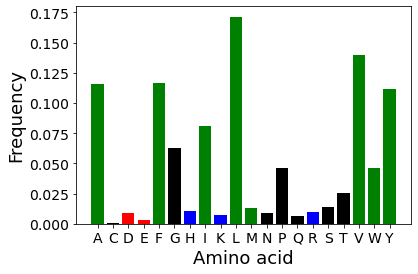

In [23]:
fig, ax = plt.subplots()
ax.bar(range(len(aa_dict_surf)), list(aa_dict_surf.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(aa_dict_surf)), list(aa_dict_surf.keys()),size=14)
plt.yticks(size=14)
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
plt.show()

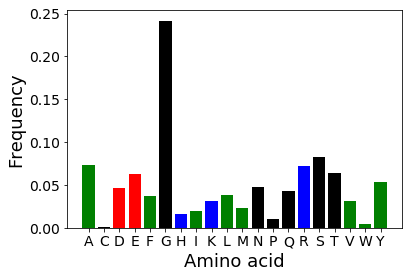

In [23]:
fig, ax = plt.subplots()
ax.bar(range(len(aa_dict_core)), list(aa_dict_core.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(aa_dict_core)), list(aa_dict_core.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

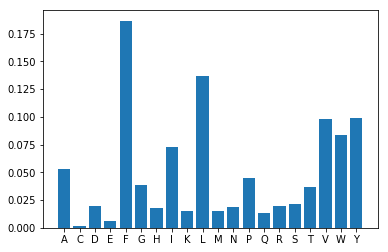

In [25]:
plt.bar(range(len(aa_dict_rim)), list(aa_dict_rim.values()))
plt.xticks(range(len(aa_dict_rim)), list(aa_dict_rim.keys()))
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
plt.show()

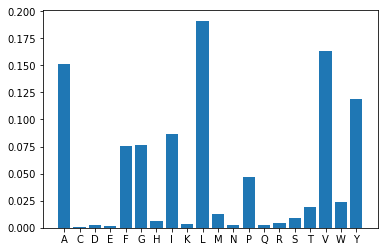

In [21]:
plt.bar(range(len(aa_dict_buried)), list(aa_dict_buried.values()))
plt.xticks(range(len(aa_dict_buried)), list(aa_dict_buried.keys()))
plt.show()

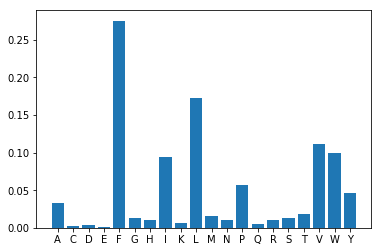

In [20]:
plt.bar(range(len(aa_dict_rim_cis)), list(aa_dict_rim_cis.values()))
plt.xticks(range(len(aa_dict_rim_cis)), list(aa_dict_rim_cis.keys()))
plt.show()

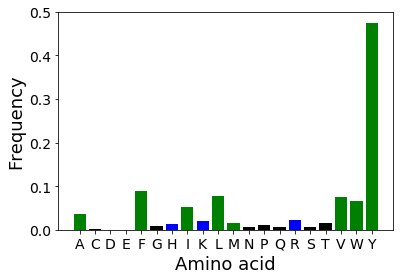

In [29]:
fig, ax = plt.subplots()
ax.bar(range(len(aa_dict_rim_Y)), list(aa_dict_rim_Y.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])

#plt.bar(range(len(aa_dict_rim_Y)), list(aa_dict_rim_Y.values()))
plt.xticks(range(len(aa_dict_rim_Y)), list(aa_dict_rim_Y.keys()), size=14)
plt.yticks(size=14)
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

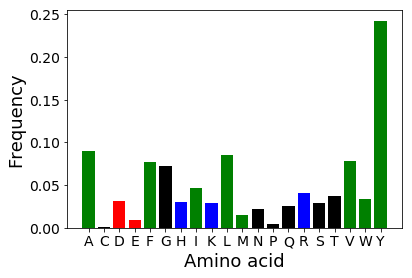

In [30]:
fig, ax = plt.subplots()
ax.bar(range(len(aa_dict_rim_trans)), list(aa_dict_rim_trans.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])

#plt.bar(range(len(aa_dict_rim_trans)), list(aa_dict_rim_trans.values()))
plt.xticks(range(len(aa_dict_rim_trans)), list(aa_dict_rim_trans.keys()),size=14)
plt.yticks(size=14)
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

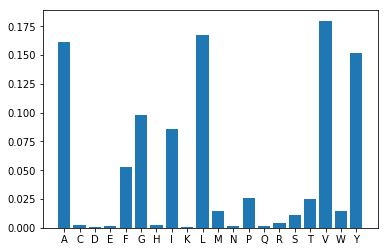

In [36]:
plt.bar(range(len(aa_dict_rim_W)), list(aa_dict_rim_W.values()))
plt.xticks(range(len(aa_dict_rim_W)), list(aa_dict_rim_W.keys()))
plt.show()

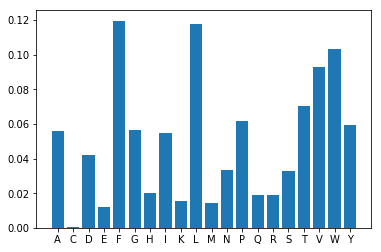

In [41]:
plt.bar(range(len(aa_dict_rim_pol)), list(aa_dict_rim_pol.values()))
plt.xticks(range(len(aa_dict_rim_pol)), list(aa_dict_rim_pol.keys()))
plt.show()

In [16]:
# Finally, get overall distributions to compare to values previously reported in litterature 

aa_dict_tot = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
n_resi = 0


with open("all_strands_id90_aligned.fa", 'r') as in_f:
    for line in in_f:
        if line[0] == ">":
            pass
        else:
            line = line.rstrip()
            strands = line.split(" ")
            for strand in strands:
                if "-" in strand or "X" in strand:
                    pass
                else:
                    for pos in range(0,len(strand)):
                        n_resi += 1
                        aa_dict_tot[strand[pos]] = aa_dict_tot[strand[pos]] + 1

for key in aa_dict_tot:    
    aa_dict_tot[key] = aa_dict_tot[key]/n_resi

print(aa_dict_tot)

{'A': 0.09673410009073352, 'C': 0.0009478865172013524, 'D': 0.02563855617114674, 'E': 0.02978999498177726, 'F': 0.08090794349177062, 'G': 0.1432809038883623, 'H': 0.0128861877220817, 'I': 0.053553053765948065, 'K': 0.01846604589392795, 'L': 0.11176342374582449, 'M': 0.01767022673242735, 'N': 0.02633502466025618, 'P': 0.02996233798490478, 'Q': 0.022701628641379555, 'R': 0.03787288182845788, 'S': 0.044580065997232375, 'T': 0.04282926384193105, 'V': 0.09103968451092603, 'W': 0.027519122469979368, 'Y': 0.08552166706373143}


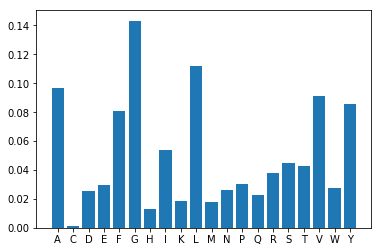

In [43]:
plt.bar(range(len(aa_dict_tot)), list(aa_dict_tot.values()))
plt.xticks(range(len(aa_dict_tot)), list(aa_dict_tot.keys()))
plt.show()

In [33]:
published = {'A': 0.09, 'C': 0.0, 'D': 0.055, 'E': 0.04, 'F': 0.05, 'G': 0.115, 'H': 0.015, 'I': 0.04, 'K': 0.04, 'L': 0.075, 'M': 0.02, 'N': 0.065, 'P': 0.02, 'Q': 0.045, 'R': 0.04, 'S': 0.075, 'T': 0.08, 'V': 0.075, 'W': 0.04, 'Y':0.075}

In [34]:
x = list()
y = list()
l = list()

for key in aa_dict_tot:
    y.append(aa_dict_tot[key])
    x.append(published[key])
    l.append(key)
print(y)
print(x)

[0.09673410009073352, 0.0009478865172013524, 0.02563855617114674, 0.02978999498177726, 0.08090794349177062, 0.1432809038883623, 0.0128861877220817, 0.053553053765948065, 0.01846604589392795, 0.11176342374582449, 0.01767022673242735, 0.02633502466025618, 0.02996233798490478, 0.022701628641379555, 0.03787288182845788, 0.044580065997232375, 0.04282926384193105, 0.09103968451092603, 0.027519122469979368, 0.08552166706373143]
[0.09, 0.0, 0.055, 0.04, 0.05, 0.115, 0.015, 0.04, 0.04, 0.075, 0.02, 0.065, 0.02, 0.045, 0.04, 0.075, 0.08, 0.075, 0.04, 0.075]


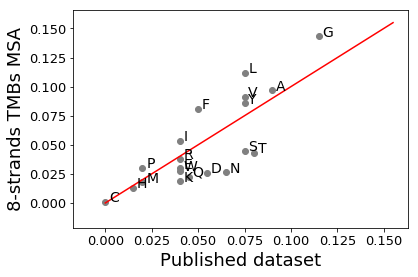

In [35]:
fig, ax = plt.subplots()

ax.scatter(x,y,color="grey")
ax.plot([0, 0.155], [0, 0.155], c='r')  
ax.set_xlabel('Published dataset', size=18)
ax.set_ylabel('8-strands TMBs MSA',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for i, txt in enumerate(l):
    ax.annotate(txt, (x[i]+0.002, y[i]),size=14)

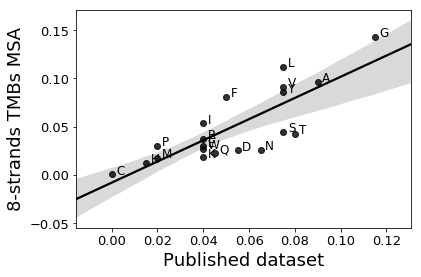

In [37]:
ax = sns.regplot(x=x, y=y,color="black");
ax.set_xlabel('Published dataset', size=18)
ax.set_ylabel('8-strands TMBs MSA',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for i, txt in enumerate(l):
    ax.annotate(txt, (x[i]+0.002, y[i]),size=12)

In [25]:
# First, calculate the general amino acid frequencies on the surface

daa_dict = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
daa_dict_surf = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
daa_dict_core = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
daa_dict_bound = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
dn_resi = 0.0
dn_resi_surf = 0.0
dn_resi_core = 0.0
dn_resi_bound = 0.0

dres_num = [7,8,9,10,11,12,13,14,15,21,22,23,24,25,26,27,28,29,30,31,35,36,37,38,39,40,41,42,43,49,50,51,52,53,54,55,56,57,58,59,60,61,65,66,67,68,69,70,71,72,73,74,75,81,82,83,84,85,86,87,88,89,90,91,92,93,97,98,99,100,101,102,103,104,105,111,112,113,114,115,116,117,118,119,120,121]
dres_num_surf = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,61,65,67,69,71,73,75,81,83,85,87,89,91,93,97,99,101,103,105,111,113,115,117,119,121]
dres_num_core = [8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,60,66,68,70,72,74,82,84,86,88,90,92,98,100,102,104,112,114,116,118,120]
dres_num_bound = [7,15,21,31,35,43,49,61,65,75,81,93,97,105,111,121]

with open("designs_round4.fasta", 'r') as in_f:
    for line in in_f:
        if line[0] == ">" or line == "":
            pass
        else:
            line = line.rstrip()
            for resi in range(0,len(line)):
                if resi+1 in dres_num:
                    daa_dict[line[resi]] = daa_dict[line[resi]] + 1
                    dn_resi += 1
                if resi+1 in dres_num_surf:
                    daa_dict_surf[line[resi]] = daa_dict_surf[line[resi]] + 1
                    dn_resi_surf += 1
                if resi+1 in dres_num_core:
                    daa_dict_core[line[resi]] = daa_dict_core[line[resi]] + 1
                    dn_resi_core += 1
                if resi+1 in dres_num_bound:
                    daa_dict_bound[line[resi]] = daa_dict_bound[line[resi]] + 1
                    dn_resi_bound += 1

for key in daa_dict:    
    daa_dict[key] = daa_dict[key]/dn_resi

for key in daa_dict_surf:    
    daa_dict_surf[key] = daa_dict_surf[key]/dn_resi_surf
    
for key in daa_dict_core:    
    daa_dict_core[key] = daa_dict_core[key]/dn_resi_core
    
for key in daa_dict_bound:    
    daa_dict_bound[key] = daa_dict_bound[key]/dn_resi_bound



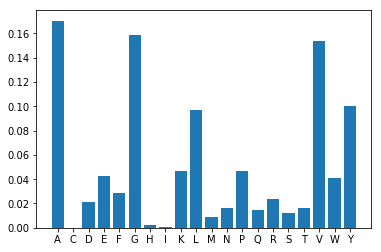

In [39]:
plt.bar(range(len(daa_dict)), list(daa_dict.values()))
plt.xticks(range(len(daa_dict)), list(daa_dict.keys()))
plt.show()

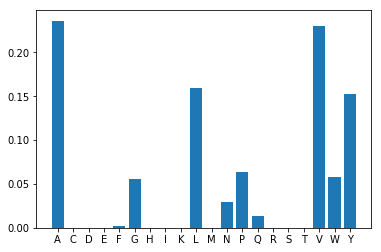

In [40]:
plt.bar(range(len(daa_dict_surf)), list(daa_dict_surf.values()))
plt.xticks(range(len(daa_dict_surf)), list(daa_dict_surf.keys()))
plt.show()

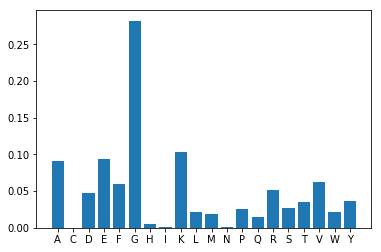

In [41]:
plt.bar(range(len(daa_dict_core)), list(daa_dict_core.values()))
plt.xticks(range(len(daa_dict_core)), list(daa_dict_core.keys()))
plt.show()

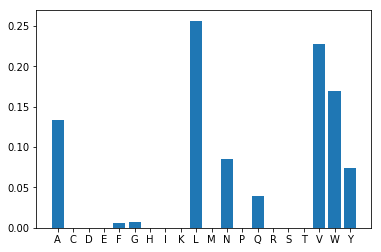

In [42]:
plt.bar(range(len(daa_dict_bound)), list(daa_dict_bound.values()))
plt.xticks(range(len(daa_dict_bound)), list(daa_dict_bound.keys()))
plt.show()

In [46]:
x = list()
y = list()
l = list()

for key in aa_dict_tot:
    y.append(aa_dict_tot[key])
    x.append(daa_dict[key])
    l.append(key)
print(y)
print(x)

[0.09673410009073352, 0.0009478865172013524, 0.02563855617114674, 0.02978999498177726, 0.08090794349177062, 0.1432809038883623, 0.0128861877220817, 0.053553053765948065, 0.01846604589392795, 0.11176342374582449, 0.01767022673242735, 0.02633502466025618, 0.02996233798490478, 0.022701628641379555, 0.03787288182845788, 0.044580065997232375, 0.04282926384193105, 0.09103968451092603, 0.027519122469979368, 0.08552166706373143]
[0.17031287461040517, 0.0, 0.021622512586909615, 0.04258571086070487, 0.028470390793574683, 0.15843023255813954, 0.002187724766243107, 0.0002847039079357468, 0.046976144809398226, 0.09694917286022536, 0.008765883481179574, 0.01610824742268041, 0.046511627906976744, 0.01426516422920163, 0.023585471110045553, 0.012347158954687125, 0.015973387676816112, 0.15350035962598896, 0.041042315991368976, 0.10008091584751858]


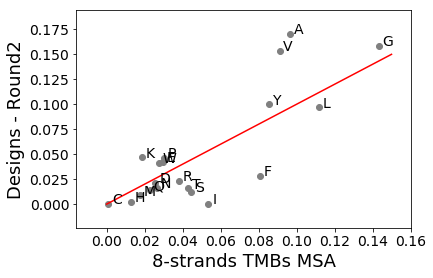

In [47]:
fig, ax = plt.subplots()

ax.scatter(y,x,color="grey")
ax.plot([0, 0.15], [0, 0.15], c='r')  
ax.set_xlabel('8-strands TMBs MSA',size=18)
ax.set_ylabel('Designs - Round2',size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for i, txt in enumerate(l):
    ax.annotate(txt, (y[i]+0.002, x[i]),size=14)

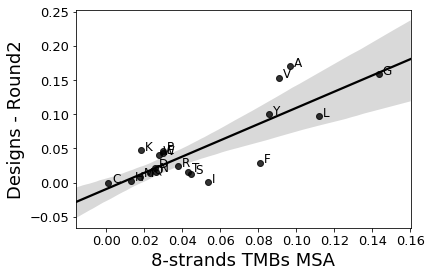

In [50]:
ax = sns.regplot(x=y, y=x,color="black");
ax.set_xlabel('8-strands TMBs MSA', size=18)
ax.set_ylabel('Designs - Round2',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for i, txt in enumerate(l):
    ax.annotate(txt, (y[i]+0.002, x[i]),size=12)

In [51]:
x_core = list()
y_core = list()
l_core = list()

for key in aa_dict_core:
    y_core.append(aa_dict_core[key])
    x_core.append(daa_dict_core[key])
    l_core.append(key)
print(y_core)
print(x_core)

[0.07375576727590738, 0.0008407206305630124, 0.046099890232990055, 0.06263030606288049, 0.03760027227627928, 0.24165195969048858, 0.01564010845972317, 0.01954393723220343, 0.03168367266440822, 0.03870695814653783, 0.02279412261899127, 0.04802475730671878, 0.010167535561581096, 0.04238313870538039, 0.0718399159730158, 0.08242668487852375, 0.0642148277875073, 0.03166564112273394, 0.004873024137472474, 0.053456759236093734]
[0.09093312186095691, 0.0, 0.04768041237113402, 0.09390695215437483, 0.06020354216230505, 0.2820182394924663, 0.004824213587100185, 0.0006278086174993392, 0.10358842188739097, 0.021940259053661114, 0.019329896907216496, 0.0005947660586835844, 0.02564102564102564, 0.015100449378799894, 0.05200898757599789, 0.027227068464181867, 0.0352233676975945, 0.06178958498546128, 0.021081152524451495, 0.036280729579698655]


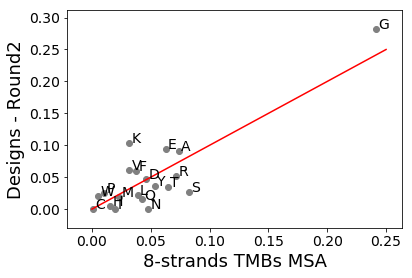

In [52]:
fig, ax = plt.subplots()

ax.scatter(y_core,x_core,color="grey")
ax.plot([0, 0.25], [0, 0.25], c='r')  
ax.set_xlabel('8-strands TMBs MSA',size=18)
ax.set_ylabel('Designs - Round2',size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for i, txt in enumerate(l):
    ax.annotate(txt, (y_core[i]+0.002, x_core[i]),size=14)

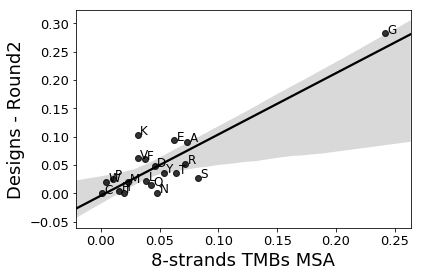

In [54]:
ax = sns.regplot(x=y_core, y=x_core,color="black");
ax.set_xlabel('8-strands TMBs MSA', size=18)
ax.set_ylabel('Designs - Round2',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for i, txt in enumerate(l_core):
    ax.annotate(txt, (y_core[i]+0.002, x_core[i]),size=12)

In [55]:
x_surf = list()
y_surf = list()
l_surf = list()

for key in aa_dict_surf:
    y_surf.append(aa_dict_surf[key])
    x_surf.append(daa_dict_surf[key])
    l_surf.append(key)
print(y_surf)
print(x_surf)

[0.11551798473665009, 0.0010354904207923528, 0.008912219155467279, 0.002944330413569715, 0.11631026388423144, 0.06286642910575636, 0.010634965674045304, 0.0813541708890846, 0.00766115510614698, 0.17148421521986668, 0.013481643076401505, 0.008604520044662434, 0.046143811562853534, 0.006612767117835862, 0.0101061654057759, 0.01364194141556331, 0.025347405193666187, 0.13957563317843968, 0.04603141847447571, 0.11173346992471506]
[0.23618118008335162, 0.0, 0.0, 0.0, 0.0021386268918622505, 0.05587848212327265, 0.0, 0.0, 0.0, 0.1591906119763106, 0.0, 0.028981136214082034, 0.06382978723404255, 0.013572055275279667, 0.0, 0.0, 0.0, 0.22960078964685238, 0.05760583461285369, 0.15302149594209258]


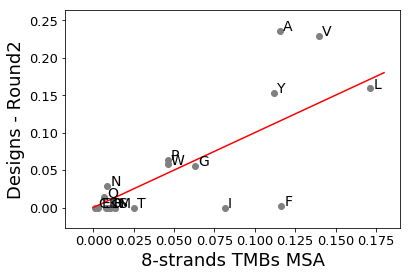

In [56]:
fig, ax = plt.subplots()

ax.scatter(y_surf,x_surf,color="grey")
ax.plot([0, 0.18], [0, 0.18], c='r')  
ax.set_xlabel('8-strands TMBs MSA',size=18)
ax.set_ylabel('Designs - Round2',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for i, txt in enumerate(l):
    ax.annotate(txt, (y_surf[i]+0.002, x_surf[i]),size=14)

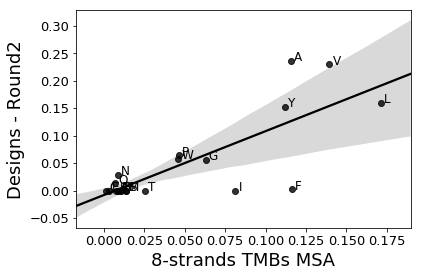

In [57]:
ax = sns.regplot(x=y_surf, y=x_surf,color="black");
ax.set_xlabel('8-strands TMBs MSA', size=18)
ax.set_ylabel('Designs - Round2',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for i, txt in enumerate(l_surf):
    ax.annotate(txt, (y_surf[i]+0.002, x_surf[i]),size=12)

In [58]:
# amino acid distributions of other design orders

d1_dict = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
d1_dict_surf = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
d1_dict_core = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
d1_dict_bound = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
d1_resi = 0.0
d1_resi_surf = 0.0
d1_resi_core = 0.0
d1_resi_bound = 0.0

d2_dict = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
d2_dict_surf = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
d2_dict_core = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
d2_dict_bound = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
d2_resi = 0.0
d2_resi_surf = 0.0
d2_resi_core = 0.0
d2_resi_bound = 0.0

dres_num = [7,8,9,10,11,12,13,14,15,21,22,23,24,25,26,27,28,29,30,31,35,36,37,38,39,40,41,42,43,49,50,51,52,53,54,55,56,57,58,59,60,61,65,66,67,68,69,70,71,72,73,74,75,81,82,83,84,85,86,87,88,89,90,91,92,93,97,98,99,100,101,102,103,104,105,111,112,113,114,115,116,117,118,119,120,121]
dres_num_surf = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,61,65,67,69,71,73,75,81,83,85,87,89,91,93,97,99,101,103,105,111,113,115,117,119,121]
dres_num_core = [8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,60,66,68,70,72,74,82,84,86,88,90,92,98,100,102,104,112,114,116,118,120]
dres_num_bound = [7,15,21,31,35,43,49,61,65,75,81,93,97,105,111,121]

with open("stacey_order.fasta", 'r') as in_f:
    for line in in_f:
        if line[0] == ">" or line == "":
            pass
        else:
            line = line.rstrip()
            for resi in range(0,len(line)):
                if resi+1 in dres_num:
                    d1_dict[line[resi]] = d1_dict[line[resi]] + 1
                    d1_resi += 1
                if resi+1 in dres_num_surf:
                    d1_dict_surf[line[resi]] = d1_dict_surf[line[resi]] + 1
                    d1_resi_surf += 1
                if resi+1 in dres_num_core:
                    d1_dict_core[line[resi]] = d1_dict_core[line[resi]] + 1
                    d1_resi_core += 1
                if resi+1 in dres_num_bound:
                    d1_dict_bound[line[resi]] = d1_dict_bound[line[resi]] + 1
                    d1_resi_bound += 1

for key in d1_dict:    
    d1_dict[key] = d1_dict[key]/d1_resi

for key in d1_dict_surf:    
    d1_dict_surf[key] = d1_dict_surf[key]/d1_resi_surf
    
for key in d1_dict_core:    
    d1_dict_core[key] = d1_dict_core[key]/d1_resi_core
    
for key in d1_dict_bound:    
    d1_dict_bound[key] = d1_dict_bound[key]/d1_resi_bound

with open("order2.fasta", 'r') as in_f:
    for line in in_f:
        if line[0] == ">" or line == "":
            pass
        else:
            line = line.rstrip()
            for resi in range(0,len(line)):
                if resi+1 in dres_num:
                    d2_dict[line[resi]] = d2_dict[line[resi]] + 1
                    d2_resi += 1
                if resi+1 in dres_num_surf:
                    d2_dict_surf[line[resi]] = d2_dict_surf[line[resi]] + 1
                    d2_resi_surf += 1
                if resi+1 in dres_num_core:
                    d2_dict_core[line[resi]] = d2_dict_core[line[resi]] + 1
                    d2_resi_core += 1
                if resi+1 in dres_num_bound:
                    d2_dict_bound[line[resi]] = d2_dict_bound[line[resi]] + 1
                    d2_resi_bound += 1

for key in d2_dict:    
    d2_dict[key] = d2_dict[key]/d2_resi

for key in d2_dict_surf:    
    d2_dict_surf[key] = d2_dict_surf[key]/d2_resi_surf
    
for key in d2_dict_core:    
    d2_dict_core[key] = d2_dict_core[key]/d2_resi_core
    
for key in d2_dict_bound:    
    d2_dict_bound[key] = d2_dict_bound[key]/d2_resi_bound

In [59]:
x1 = list()
x2 = list()
y = list()
l = list()

for key in aa_dict_tot:
    y.append(aa_dict_tot[key])
    x1.append(d1_dict[key])
    x2.append(d2_dict[key])
    l.append(key)
print(y)
print(x1)
print(x2)

[0.09673410009073352, 0.0009478865172013524, 0.02563855617114674, 0.02978999498177726, 0.08090794349177062, 0.1432809038883623, 0.0128861877220817, 0.053553053765948065, 0.01846604589392795, 0.11176342374582449, 0.01767022673242735, 0.02633502466025618, 0.02996233798490478, 0.022701628641379555, 0.03787288182845788, 0.044580065997232375, 0.04282926384193105, 0.09103968451092603, 0.027519122469979368, 0.08552166706373143]
[0.0, 0.0, 0.0, 0.1124031007751938, 0.01808785529715762, 0.1343669250645995, 0.0103359173126615, 0.14857881136950904, 0.07622739018087855, 0.1124031007751938, 0.0, 0.0, 0.023255813953488372, 0.015503875968992248, 0.046511627906976744, 0.03488372093023256, 0.0, 0.08785529715762273, 0.04263565891472868, 0.13695090439276486]
[0.07267441860465117, 0.0, 0.0, 0.05886627906976744, 0.08502906976744186, 0.13880813953488372, 0.034156976744186045, 0.07848837209302326, 0.0436046511627907, 0.24127906976744187, 0.0, 0.0, 0.023255813953488372, 0.0436046511627907, 0.02616279069767442,

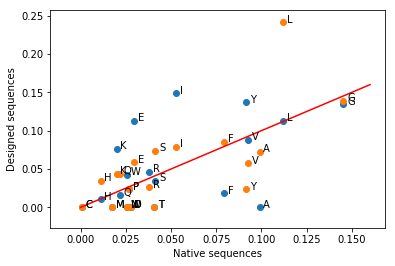

In [21]:
fig, ax = plt.subplots()

ax.scatter(y,x1)
ax.scatter(y,x2)
ax.plot([0, 0.16], [0, 0.16], c='r')  
ax.set_xlabel('Native sequences')
ax.set_ylabel('Designed sequences')

for i, txt in enumerate(l):
    ax.annotate(txt, (y[i]+0.002, x1[i]))
    ax.annotate(txt, (y[i]+0.002, x2[i]))

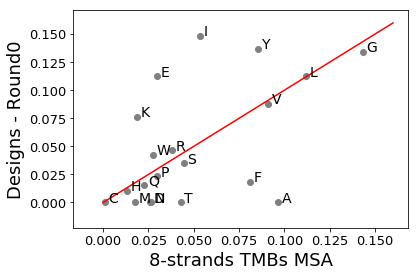

In [60]:
fig, ax = plt.subplots()

ax.scatter(y,x1,color="grey")
#ax.scatter(y,x2)
ax.plot([0, 0.16], [0, 0.16], c='r')  
ax.set_xlabel('8-strands TMBs MSA',size=18)
ax.set_ylabel('Designs - Round0',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for i, txt in enumerate(l):
    ax.annotate(txt, (y[i]+0.002, x1[i]),size=14)
#    ax.annotate(txt, (y[i]+0.002, x2[i]))

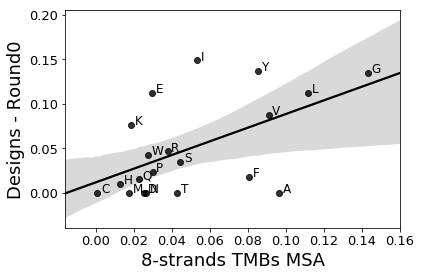

In [62]:
ax = sns.regplot(x=y, y=x1,color="black");
ax.set_xlabel('8-strands TMBs MSA', size=18)
ax.set_ylabel('Designs - Round0',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for i, txt in enumerate(l):
    ax.annotate(txt, (y[i]+0.002, x1[i]),size=12)

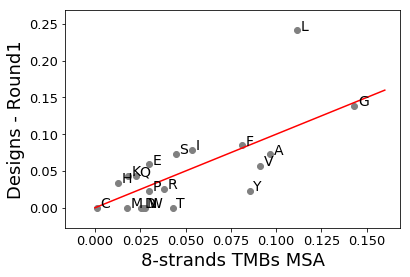

In [70]:
fig, ax = plt.subplots()

#ax.scatter(y,x1)
ax.scatter(y,x2,color="grey")
ax.plot([0, 0.16], [0, 0.16], c='r')  
ax.set_xlabel('8-strands TMBs MSA',size=18)
ax.set_ylabel('Designs - Round1',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for i, txt in enumerate(l):
#    ax.annotate(txt, (y[i]+0.002, x1[i]))
    ax.annotate(txt, (y[i]+0.002, x2[i]),size=14)

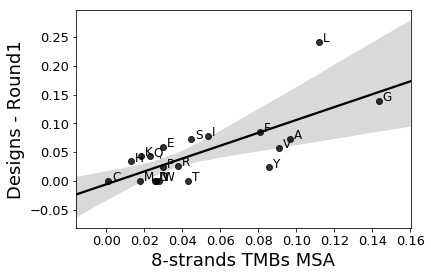

In [64]:
ax = sns.regplot(x=y, y=x2,color="black");
ax.set_xlabel('8-strands TMBs MSA', size=18)
ax.set_ylabel('Designs - Round1',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for i, txt in enumerate(l):
    ax.annotate(txt, (y[i]+0.002, x2[i]),size=12)

In [65]:
x1_core = list()
x2_core = list()
y_core = list()
l = list()

for key in aa_dict_core:
    y_core.append(aa_dict_core[key])
    x1_core.append(d1_dict_core[key])
    x2_core.append(d2_dict_core[key])
    l.append(key)
print(y_core)
print(x1_core)
print(x2_core)

[0.07375576727590738, 0.0008407206305630124, 0.046099890232990055, 0.06263030606288049, 0.03760027227627928, 0.24165195969048858, 0.01564010845972317, 0.01954393723220343, 0.03168367266440822, 0.03870695814653783, 0.02279412261899127, 0.04802475730671878, 0.010167535561581096, 0.04238313870538039, 0.0718399159730158, 0.08242668487852375, 0.0642148277875073, 0.03166564112273394, 0.004873024137472474, 0.053456759236093734]
[0.0, 0.0, 0.0, 0.24786324786324787, 0.0, 0.2962962962962963, 0.011396011396011397, 0.0, 0.15669515669515668, 0.0, 0.0, 0.0, 0.02564102564102564, 0.03418803418803419, 0.09971509971509972, 0.07692307692307693, 0.0, 0.0, 0.0, 0.05128205128205128]
[0.02564102564102564, 0.0, 0.0, 0.12980769230769232, 0.0, 0.3060897435897436, 0.07371794871794872, 0.0, 0.08814102564102565, 0.0, 0.0, 0.0, 0.02564102564102564, 0.08173076923076923, 0.05608974358974359, 0.16185897435897437, 0.0, 0.0, 0.0, 0.05128205128205128]


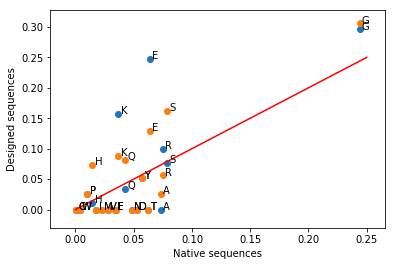

In [22]:
fig, ax = plt.subplots()

ax.scatter(y_core,x1_core)
ax.scatter(y_core,x2_core)
ax.plot([0, 0.25], [0, 0.25], c='r')  
ax.set_xlabel('Native sequences')
ax.set_ylabel('Designed sequences')

for i, txt in enumerate(l):
    ax.annotate(txt, (y_core[i]+0.002, x1_core[i]))
    ax.annotate(txt, (y_core[i]+0.002, x2_core[i]))

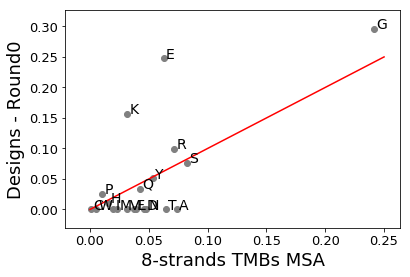

In [72]:
fig, ax = plt.subplots()

ax.scatter(y_core,x1_core,color="grey")
#ax.scatter(y_core,x2_core)
ax.plot([0, 0.25], [0, 0.25], c='r')  
ax.set_xlabel('8-strands TMBs MSA',size=18)
ax.set_ylabel('Designs - Round0',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for i, txt in enumerate(l):
    ax.annotate(txt, (y_core[i]+0.002, x1_core[i]),size=14)
#    ax.annotate(txt, (y_core[i]+0.002, x2_core[i]))

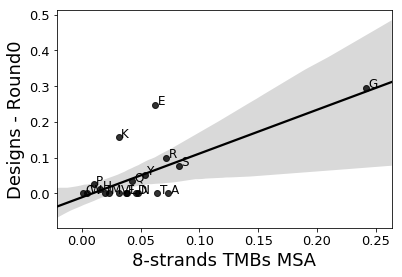

In [66]:
ax = sns.regplot(x=y_core, y=x1_core,color="black");
ax.set_xlabel('8-strands TMBs MSA', size=18)
ax.set_ylabel('Designs - Round0',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for i, txt in enumerate(l_core):
    ax.annotate(txt, (y_core[i]+0.002, x1_core[i]),size=12)

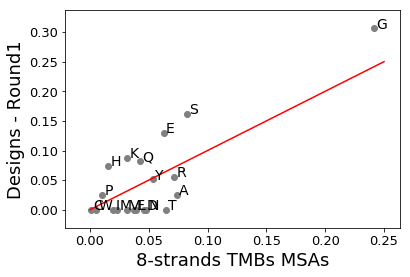

In [73]:
fig, ax = plt.subplots()

#ax.scatter(y_core,x1_core)
ax.scatter(y_core,x2_core,color="grey")
ax.plot([0, 0.25], [0, 0.25], c='r')  
ax.set_xlabel('8-strands TMBs MSAs',size=18)
ax.set_ylabel('Designs - Round1',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for i, txt in enumerate(l):
#    ax.annotate(txt, (y_core[i]+0.002, x1_core[i]))
    ax.annotate(txt, (y_core[i]+0.002, x2_core[i]),size=14)

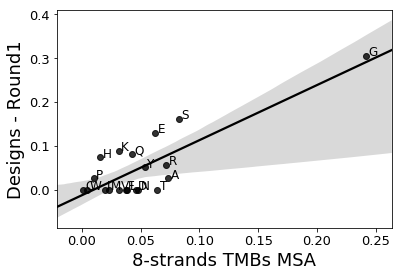

In [67]:
ax = sns.regplot(x=y_core, y=x2_core,color="black");
ax.set_xlabel('8-strands TMBs MSA', size=18)
ax.set_ylabel('Designs - Round1',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for i, txt in enumerate(l_core):
    ax.annotate(txt, (y_core[i]+0.002, x2_core[i]),size=12)

In [68]:
x1_surf = list()
x2_surf = list()
y_surf = list()
l = list()

for key in aa_dict_surf:
    y_surf.append(aa_dict_surf[key])
    x1_surf.append(d1_dict_surf[key])
    x2_surf.append(d2_dict_surf[key])
    l.append(key)
print(y_surf)
print(x1_surf)
print(x2_surf)

[0.11551798473665009, 0.0010354904207923528, 0.008912219155467279, 0.002944330413569715, 0.11631026388423144, 0.06286642910575636, 0.010634965674045304, 0.0813541708890846, 0.00766115510614698, 0.17148421521986668, 0.013481643076401505, 0.008604520044662434, 0.046143811562853534, 0.006612767117835862, 0.0101061654057759, 0.01364194141556331, 0.025347405193666187, 0.13957563317843968, 0.04603141847447571, 0.11173346992471506]
[0.0, 0.0, 0.0, 0.0, 0.03309692671394799, 0.0, 0.009456264775413711, 0.2718676122931442, 0.009456264775413711, 0.20567375886524822, 0.0, 0.0, 0.02127659574468085, 0.0, 0.002364066193853428, 0.0, 0.0, 0.1607565011820331, 0.07801418439716312, 0.20803782505910165]
[0.11170212765957446, 0.0, 0.0, 0.0, 0.15558510638297873, 0.0, 0.0013297872340425532, 0.14361702127659576, 0.006648936170212766, 0.44148936170212766, 0.0, 0.0, 0.02127659574468085, 0.011968085106382979, 0.0013297872340425532, 0.0, 0.0, 0.10505319148936171, 0.0, 0.0]


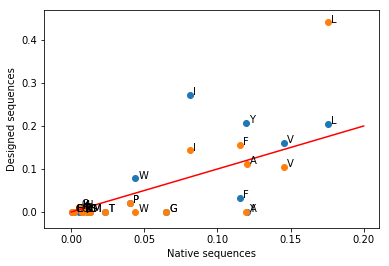

In [30]:
fig, ax = plt.subplots()

ax.scatter(y_surf,x1_surf)
ax.scatter(y_surf,x2_surf)
ax.plot([0, 0.2], [0, 0.2], c='r')  
ax.set_xlabel('Native sequences')
ax.set_ylabel('Designed sequences')

for i, txt in enumerate(l):
    ax.annotate(txt, (y_surf[i]+0.002, x1_surf[i]))
    ax.annotate(txt, (y_surf[i]+0.002, x2_surf[i]))

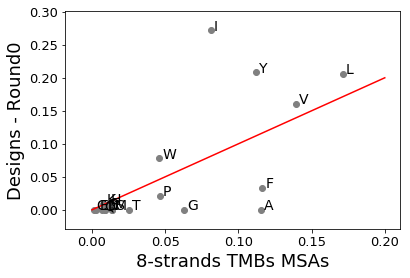

In [76]:
fig, ax = plt.subplots()

ax.scatter(y_surf,x1_surf,color="grey")
#ax.scatter(y_surf,x2_surf)
ax.plot([0, 0.2], [0, 0.2], c='r')  
ax.set_xlabel('8-strands TMBs MSAs',size=18)
ax.set_ylabel('Designs - Round0',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for i, txt in enumerate(l):
    ax.annotate(txt, (y_surf[i]+0.002, x1_surf[i]),size=14)
#    ax.annotate(txt, (y_surf[i]+0.002, x2_surf[i]))

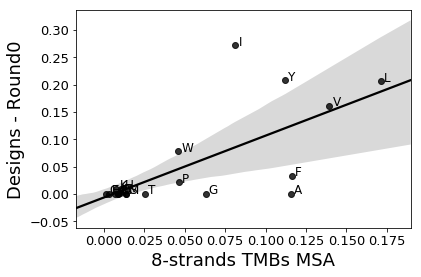

In [69]:
ax = sns.regplot(x=y_surf, y=x1_surf,color="black");
ax.set_xlabel('8-strands TMBs MSA', size=18)
ax.set_ylabel('Designs - Round0',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for i, txt in enumerate(l_surf):
    ax.annotate(txt, (y_surf[i]+0.002, x1_surf[i]),size=12)

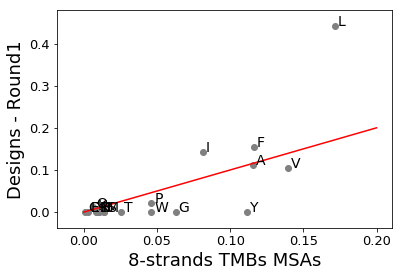

In [77]:
fig, ax = plt.subplots()

#ax.scatter(y_surf,x1_surf)
ax.scatter(y_surf,x2_surf,color="grey")
ax.plot([0, 0.2], [0, 0.2], c='r')  
ax.set_xlabel('8-strands TMBs MSAs',size=18)
ax.set_ylabel('Designs - Round1',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for i, txt in enumerate(l):
#    ax.annotate(txt, (y_surf[i]+0.002, x1_surf[i]))
    ax.annotate(txt, (y_surf[i]+0.002, x2_surf[i]),size=14)

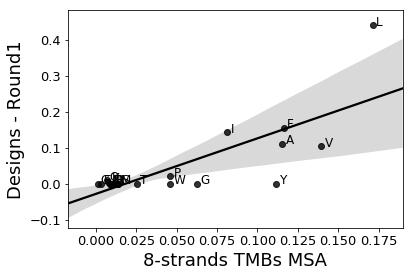

In [70]:
ax = sns.regplot(x=y_surf, y=x2_surf,color="black");
ax.set_xlabel('8-strands TMBs MSA', size=18)
ax.set_ylabel('Designs - Round1',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for i, txt in enumerate(l_surf):
    ax.annotate(txt, (y_surf[i]+0.002, x2_surf[i]),size=12)

In [87]:
dround0 = pd.read_csv("/home/av9/beta_barrel/natural_proteins/membrane/amino_acid_frequencies_TM/round0_frag_qual.dat",sep="\s+", names=["n_mer","position","frag_number","RMSD","score1","score2"])
print(dround0)
dround1 = pd.read_csv("/home/av9/beta_barrel/natural_proteins/membrane/amino_acid_frequencies_TM/round1_frag_qual.dat",sep="\s+", names=["n_mer","position","frag_number","RMSD","score1","score2"])
dround2 = pd.read_csv("/home/av9/beta_barrel/natural_proteins/membrane/amino_acid_frequencies_TM/round2_frag_qual.dat",sep="\s+", names=["n_mer","position","frag_number","RMSD","score1","score2"])




       n_mer  position  frag_number    RMSD  score1  score2
0          9         1            1  4.2484       0      58
1          9         1            2  3.3877       0     250
2          9         1            3  2.5606       0      77
3          9         1            4  3.1166       0     138
4          9         1            5  3.8017       0      97
5          9         1            6  1.5299       0     245
6          9         1            7  2.6613       0       6
7          9         1            8  1.7441       0     188
8          9         1            9  3.3381       0       4
9          9         1           10  2.2678       0     251
10         9         1           11  2.3693       0     282
11         9         1           12  2.1995       0      70
12         9         1           13  2.1579       0      63
13         9         1           14  3.4227       0      33
14         9         1           15  2.5951       0       9
15         9         1           16  2.3

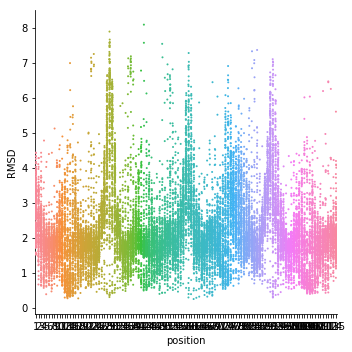

In [99]:
sns.catplot(x ='position', y='RMSD',s=2, data=dround0)

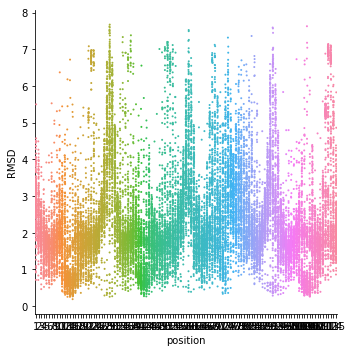

In [100]:
sns.catplot(x ='position', y='RMSD',s=2, data=dround1)

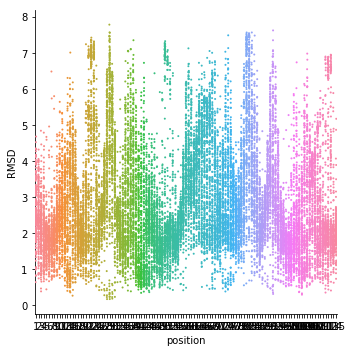

In [101]:
sns.catplot(x ='position', y='RMSD',s=2, data=dround2)

In [2]:
# Calculate the F frequency obtained with ref2015

daa_dict = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
daa_dict_surf = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
daa_dict_core = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
daa_dict_bound = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
dn_resi = 0.0
dn_resi_surf = 0.0
dn_resi_core = 0.0
dn_resi_bound = 0.0

dres_num = [7,8,9,10,11,12,13,14,15,21,22,23,24,25,26,27,28,29,30,31,35,36,37,38,39,40,41,42,43,49,50,51,52,53,54,55,56,57,58,59,60,61,65,66,67,68,69,70,71,72,73,74,75,81,82,83,84,85,86,87,88,89,90,91,92,93,97,98,99,100,101,102,103,104,105,111,112,113,114,115,116,117,118,119,120,121]
dres_num_surf = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,61,65,67,69,71,73,75,81,83,85,87,89,91,93,97,99,101,103,105,111,113,115,117,119,121]
dres_num_core = [8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,60,66,68,70,72,74,82,84,86,88,90,92,98,100,102,104,112,114,116,118,120]
dres_num_bound = [7,15,21,31,35,43,49,61,65,75,81,93,97,105,111,121]

with open("F_freq.fasta", 'r') as in_f:
    for line in in_f:
        if line[0] == ">" or line == "":
            pass
        else:
            line = line.rstrip()
            for resi in range(0,len(line)):
                if resi+1 in dres_num:
                    daa_dict[line[resi]] = daa_dict[line[resi]] + 1
                    dn_resi += 1
                if resi+1 in dres_num_surf:
                    daa_dict_surf[line[resi]] = daa_dict_surf[line[resi]] + 1
                    dn_resi_surf += 1
                if resi+1 in dres_num_core:
                    daa_dict_core[line[resi]] = daa_dict_core[line[resi]] + 1
                    dn_resi_core += 1
                if resi+1 in dres_num_bound:
                    daa_dict_bound[line[resi]] = daa_dict_bound[line[resi]] + 1
                    dn_resi_bound += 1

for key in daa_dict:    
    daa_dict[key] = daa_dict[key]/dn_resi

for key in daa_dict_surf:    
    daa_dict_surf[key] = daa_dict_surf[key]/dn_resi_surf
    
for key in daa_dict_core:    
    daa_dict_core[key] = daa_dict_core[key]/dn_resi_core
    
for key in daa_dict_bound:    
    daa_dict_bound[key] = daa_dict_bound[key]/dn_resi_bound



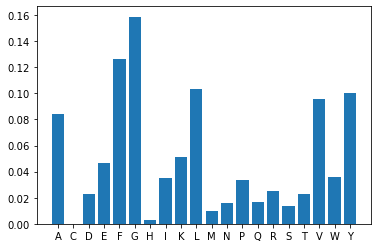

In [3]:
plt.bar(range(len(daa_dict)), list(daa_dict.values()))
plt.xticks(range(len(daa_dict)), list(daa_dict.keys()))
plt.show()

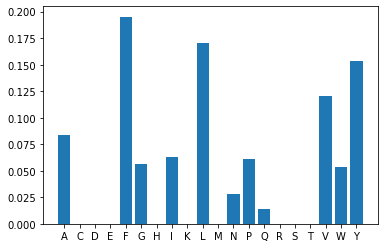

In [4]:
plt.bar(range(len(daa_dict_surf)), list(daa_dict_surf.values()))
plt.xticks(range(len(daa_dict_surf)), list(daa_dict_surf.keys()))
plt.show()

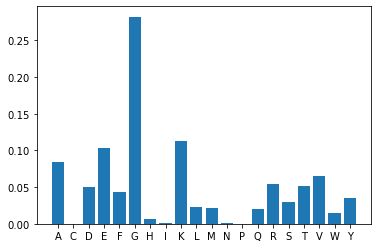

In [5]:
plt.bar(range(len(daa_dict_core)), list(daa_dict_core.values()))
plt.xticks(range(len(daa_dict_core)), list(daa_dict_core.keys()))
plt.show()

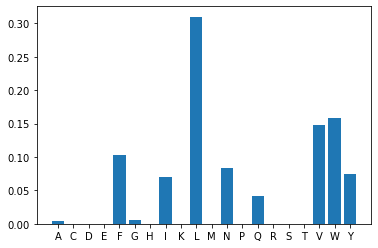

In [6]:
plt.bar(range(len(daa_dict_bound)), list(daa_dict_bound.values()))
plt.xticks(range(len(daa_dict_bound)), list(daa_dict_bound.keys()))
plt.show()

# 10-strands beta-barrel statistics

In [20]:
# First, calculate the general amino acid frequencies on the surface of 10-strands beta-barrels

aa_dict_surf10 = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
n_resi = 0

for file in glob.glob("10_strands.msa"):
    with open(file, 'r') as in_f:
        for line in in_f:
            if line[0] == ">":
                pass
            else:
                line = line.rstrip()
                strands = line.split(" ")
                for strand in strands[1:]:
                    if "-" in strand or "X" in strand:
                        pass
                    else:
                        for pos in range(0,len(strand),2):
                            n_resi += 1
                            aa_dict_surf10[strand[pos]] = aa_dict_surf10[strand[pos]] + 1

for key in aa_dict_surf10:    
    aa_dict_surf10[key] = aa_dict_surf10[key]/n_resi

print(aa_dict_surf10)



{'A': 0.11192485064458652, 'C': 0.0010393739300562485, 'D': 0.012638437620095727, 'E': 0.004126925898752751, 'F': 0.10974129196799777, 'G': 0.04809943052789715, 'H': 0.014787059357859064, 'I': 0.08668727946057367, 'K': 0.004279775006113964, 'L': 0.1887817489431576, 'M': 0.01539408866995074, 'N': 0.008620689655172414, 'P': 0.0267442266708591, 'Q': 0.00609649582503581, 'R': 0.006310484575341509, 'S': 0.018931453726024526, 'T': 0.03067899940607204, 'V': 0.1248820878314642, 'W': 0.058519372532578696, 'Y': 0.12171592775041051}


In [21]:
# Second, calculate the general amino acid frequencies in the core of 10-strands beta-barrels

aa_dict_core10 = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
n_resi = 0

for file in glob.glob("10_strands.msa"):
    with open(file, 'r') as in_f:
        for line in in_f:
            if line[0] == ">":
                pass
            else:
                line = line.rstrip()
                strands = line.split(" ")
                for strand in strands[1:]:
                    if "-" in strand or "X" in strand:
                        pass
                    else:
                        for pos in range(1,len(strand)-1,2):
                            n_resi += 1
                            aa_dict_core10[strand[pos]] = aa_dict_core10[strand[pos]] + 1

for key in aa_dict_core10:    
    aa_dict_core10[key] = aa_dict_core10[key]/n_resi

print(aa_dict_core10)


{'A': 0.08360867155525238, 'C': 0.0006448243519781719, 'D': 0.047226722373806276, 'E': 0.04291012960436562, 'F': 0.020506480218281036, 'G': 0.22199543826739426, 'H': 0.016376406889495224, 'I': 0.017053206002728513, 'K': 0.039622058321964526, 'L': 0.025313352660300135, 'M': 0.01719176330150068, 'N': 0.05833262278308322, 'P': 0.012949778308321964, 'Q': 0.0477862806957708, 'R': 0.07559366473396999, 'S': 0.12744074010914053, 'T': 0.08823968281036836, 'V': 0.019589870395634378, 'W': 0.008579894270122783, 'Y': 0.029038412346521145}


In [22]:
# Third, calculate the amino acid frequencies on lipid/water boundary of 10-strands beta-barrels

aa_dict_rim10 = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
n_resi = 0

for file in glob.glob("10_strands.msa"):
    with open(file, 'r') as in_f:
        for line in in_f:
            if line[0] == ">":
                pass
            else:
                line = line.rstrip()
                strands = line.split(" ")
                for strand in strands[1:]:
                    if "-" in strand or "X" in strand:
                        pass
                    else:
                        for pos in (0,-1):
                            n_resi += 1
                            aa_dict_rim10[strand[pos]] = aa_dict_rim10[strand[pos]] + 1

for key in aa_dict_rim10:    
    aa_dict_rim10[key] = aa_dict_rim10[key]/n_resi

print(aa_dict_rim10)


{'A': 0.05596816334430037, 'C': 0.0011128314302303076, 'D': 0.030627056318947164, 'E': 0.0052254693245597054, 'F': 0.13565657054383587, 'G': 0.02201470872846913, 'H': 0.018845558351074123, 'I': 0.07578140119992259, 'K': 0.008757499516160248, 'L': 0.17919005225469326, 'M': 0.01703115928004645, 'N': 0.023454131991484422, 'P': 0.027457905941552157, 'Q': 0.009555835107412425, 'R': 0.012749177472421134, 'S': 0.037364524869363265, 'T': 0.04416247338881363, 'V': 0.09564302303077221, 'W': 0.08992161796013161, 'Y': 0.10948083994580995}


In [23]:
# Forth, calculate the amino acid frequencies of surface residues buried in the membrane

aa_dict_buried10 = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
n_resi = 0

for file in glob.glob("10_strands.msa"):
    with open(file, 'r') as in_f:
        for line in in_f:
            if line[0] == ">":
                pass
            else:
                line = line.rstrip()
                strands = line.split(" ")
                for strand in strands:
                    if "-" in strand or "X" in strand:
                        pass
                    else:
                        for pos in range(2,len(strand)-2,2):
                            n_resi += 1
                            aa_dict_buried10[strand[pos]] = aa_dict_buried10[strand[pos]] + 1

for key in aa_dict_buried10:    
    aa_dict_buried10[key] = aa_dict_buried10[key]/n_resi

print(aa_dict_buried10)


{'A': 0.14282492208431297, 'C': 0.0011208923396577178, 'D': 0.003854776094920444, 'E': 0.003786429001038876, 'F': 0.09387473344633386, 'G': 0.06382251626660834, 'H': 0.012548526436655914, 'I': 0.09090163486248565, 'K': 0.0018453715348023402, 'L': 0.19252692875498933, 'M': 0.01453059215922139, 'N': 0.0017701897315326152, 'P': 0.023402044945048935, 'Q': 0.004237519820657226, 'R': 0.0028637432336377057, 'S': 0.010429766526327301, 'T': 0.025431953633331512, 'V': 0.1406514844988791, 'W': 0.04093990923505932, 'Y': 0.12863606539449943}


In [24]:
# Finally, get overall distributions to compare to values previously reported in litterature 

aa_dict_tot10 = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
n_resi = 0

for file in glob.glob("10_strands.msa"):
    with open(file, 'r') as in_f:
        for line in in_f:
            if line[0] == ">":
                pass
            else:
                line = line.rstrip()
                strands = line.split(" ")
                for strand in strands:
                    if "-" in strand or "X" in strand:
                        pass
                    else:
                        for pos in range(0,len(strand)):
                            n_resi += 1
                            aa_dict_tot10[strand[pos]] = aa_dict_tot10[strand[pos]] + 1

for key in aa_dict_tot10:    
    aa_dict_tot10[key] = aa_dict_tot10[key]/n_resi

print(aa_dict_tot10)

{'A': 0.09884176525678026, 'C': 0.0009030790695896485, 'D': 0.028576001987729593, 'E': 0.021604613826188338, 'F': 0.06931968043424247, 'G': 0.12619693813191643, 'H': 0.015469409988341202, 'I': 0.05524311461936889, 'K': 0.02015204220102827, 'L': 0.11492278435045201, 'M': 0.016190917604785842, 'N': 0.03145725425737276, 'P': 0.020505628715047495, 'Q': 0.024794059746564477, 'R': 0.03741566483821028, 'S': 0.06819202614628925, 'T': 0.057257124290437875, 'V': 0.0773589954320445, 'W': 0.03593681313430554, 'Y': 0.07966208596930487}


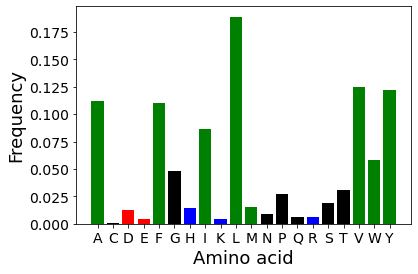

In [25]:
fig, ax = plt.subplots()
ax.bar(range(len(aa_dict_surf10)), list(aa_dict_surf10.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(aa_dict_surf10)), list(aa_dict_surf10.keys()),size=14)
plt.yticks(size=14)
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
plt.show()

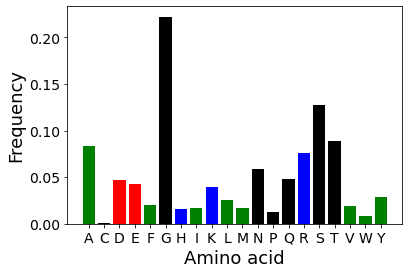

In [26]:
fig, ax = plt.subplots()
ax.bar(range(len(aa_dict_core10)), list(aa_dict_core10.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(aa_dict_core10)), list(aa_dict_core10.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

In [27]:
x = list()
y = list()
l = list()

for key in aa_dict_tot:
    y.append(aa_dict_tot[key])
    x.append(aa_dict_tot10[key])
    l.append(key)
print(y)
print(x)

[0.09892494045990434, 0.0007037625203442372, 0.027770177581332288, 0.029719275383167428, 0.07929574855980195, 0.1453262552782189, 0.011157715202304692, 0.05289172587768166, 0.02000481398009908, 0.11207876498844926, 0.01748405604149801, 0.02587373268683085, 0.026855803431653235, 0.021940748555100798, 0.037856030027200865, 0.04138471504904712, 0.04080177214642398, 0.09253231337129984, 0.02589065683561668, 0.09150699202402476]
[0.09884176525678026, 0.0009030790695896485, 0.028576001987729593, 0.021604613826188338, 0.06931968043424247, 0.12619693813191643, 0.015469409988341202, 0.05524311461936889, 0.02015204220102827, 0.11492278435045201, 0.016190917604785842, 0.03145725425737276, 0.020505628715047495, 0.024794059746564477, 0.03741566483821028, 0.06819202614628925, 0.057257124290437875, 0.0773589954320445, 0.03593681313430554, 0.07966208596930487]


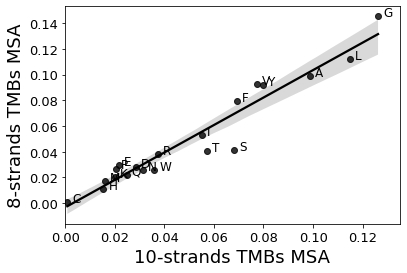

In [28]:
ax = sns.regplot(x=x, y=y,color="black");
ax.set_xlabel('10-strands TMBs MSA', size=18)
ax.set_ylabel('8-strands TMBs MSA',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.set_xlim([0,0.135])
for i, txt in enumerate(l):
    ax.annotate(txt, (x[i]+0.002, y[i]),size=12)

In [29]:
x_surf = list()
y_surf = list()
l_surf = list()

for key in aa_dict_surf:
    y_surf.append(aa_dict_surf[key])
    x_surf.append(aa_dict_surf10[key])
    l_surf.append(key)
print(y_surf)
print(x_surf)

[0.11551798473665009, 0.0010354904207923528, 0.008912219155467279, 0.002944330413569715, 0.11631026388423144, 0.06286642910575636, 0.010634965674045304, 0.0813541708890846, 0.00766115510614698, 0.17148421521986668, 0.013481643076401505, 0.008604520044662434, 0.046143811562853534, 0.006612767117835862, 0.0101061654057759, 0.01364194141556331, 0.025347405193666187, 0.13957563317843968, 0.04603141847447571, 0.11173346992471506]
[0.11192485064458652, 0.0010393739300562485, 0.012638437620095727, 0.004126925898752751, 0.10974129196799777, 0.04809943052789715, 0.014787059357859064, 0.08668727946057367, 0.004279775006113964, 0.1887817489431576, 0.01539408866995074, 0.008620689655172414, 0.0267442266708591, 0.00609649582503581, 0.006310484575341509, 0.018931453726024526, 0.03067899940607204, 0.1248820878314642, 0.058519372532578696, 0.12171592775041051]


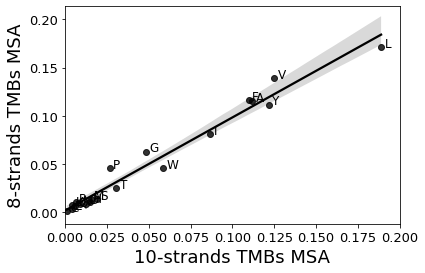

In [30]:
ax = sns.regplot(x=x_surf, y=y_surf,color="black");
ax.set_xlabel('10-strands TMBs MSA', size=18)
ax.set_ylabel('8-strands TMBs MSA',size=18)
ax.set_xlim([0,0.2])
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for i, txt in enumerate(l_surf):
    ax.annotate(txt, (x_surf[i]+0.002, y_surf[i]),size=12)

In [31]:
x_core = list()
y_core = list()
l_core = list()

for key in aa_dict_core:
    y_core.append(aa_dict_core[key])
    x_core.append(aa_dict_core10[key])
    l_core.append(key)
print(y_core)
print(x_core)

[0.07375576727590738, 0.0008407206305630124, 0.046099890232990055, 0.06263030606288049, 0.03760027227627928, 0.24165195969048858, 0.01564010845972317, 0.01954393723220343, 0.03168367266440822, 0.03870695814653783, 0.02279412261899127, 0.04802475730671878, 0.010167535561581096, 0.04238313870538039, 0.0718399159730158, 0.08242668487852375, 0.0642148277875073, 0.03166564112273394, 0.004873024137472474, 0.053456759236093734]
[0.08360867155525238, 0.0006448243519781719, 0.047226722373806276, 0.04291012960436562, 0.020506480218281036, 0.22199543826739426, 0.016376406889495224, 0.017053206002728513, 0.039622058321964526, 0.025313352660300135, 0.01719176330150068, 0.05833262278308322, 0.012949778308321964, 0.0477862806957708, 0.07559366473396999, 0.12744074010914053, 0.08823968281036836, 0.019589870395634378, 0.008579894270122783, 0.029038412346521145]


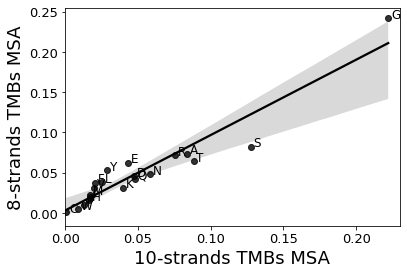

In [32]:
ax = sns.regplot(x=x_core, y=y_core,color="black");
ax.set_xlabel('10-strands TMBs MSA', size=18)
ax.set_ylabel('8-strands TMBs MSA',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.set_xlim([0,0.23])
for i, txt in enumerate(l_core):
    ax.annotate(txt, (x_core[i]+0.002, y_core[i]),size=12)

In [33]:
x_rim = list()
y_rim = list()
l_rim = list()

for key in aa_dict_rim:
    y_rim.append(aa_dict_rim[key])
    x_rim.append(aa_dict_rim10[key])
    l_rim.append(key)
print(y_rim)
print(x_rim)

[0.053002392223758715, 0.001246580735028414, 0.019809025850147873, 0.005783730859686488, 0.18667925023468018, 0.038866065750825164, 0.018012334588325546, 0.07239757345741943, 0.01471167142756205, 0.13721977167889696, 0.014958968820340968, 0.01883497693573296, 0.04503335991359732, 0.01370229431417872, 0.019930151103753874, 0.0218479676191822, 0.03634262296736684, 0.09842940921157553, 0.08401550403246157, 0.0991763482754792]
[0.05596816334430037, 0.0011128314302303076, 0.030627056318947164, 0.0052254693245597054, 0.13565657054383587, 0.02201470872846913, 0.018845558351074123, 0.07578140119992259, 0.008757499516160248, 0.17919005225469326, 0.01703115928004645, 0.023454131991484422, 0.027457905941552157, 0.009555835107412425, 0.012749177472421134, 0.037364524869363265, 0.04416247338881363, 0.09564302303077221, 0.08992161796013161, 0.10948083994580995]


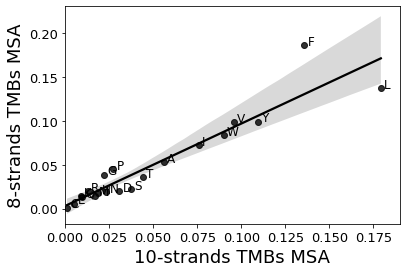

In [34]:
ax = sns.regplot(x=x_rim, y=y_rim,color="black");
ax.set_xlabel('10-strands TMBs MSA', size=18)
ax.set_ylabel('8-strands TMBs MSA',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.set_xlim([0,0.19])
for i, txt in enumerate(l_rim):
    ax.annotate(txt, (x_rim[i]+0.002, y_rim[i]),size=12)

In [35]:
x_buried = list()
y_buried = list()
l_buried = list()

for key in aa_dict_buried:
    y_buried.append(aa_dict_buried[key])
    x_buried.append(aa_dict_buried10[key])
    l_buried.append(key)
print(y_buried)
print(x_buried)

[0.15146432343962205, 0.0009141139189079386, 0.002646577441409651, 0.001311680924909169, 0.07584823967776759, 0.07666658928136136, 0.0063929935344577415, 0.08650419621818013, 0.003607122543500215, 0.1911862006523581, 0.012632183774623038, 0.002722028114081417, 0.04678231900544406, 0.0025363033813509154, 0.0044573935855320435, 0.008923493017910828, 0.01902517730908078, 0.1632346283764176, 0.02419064643814786, 0.11895378936493749]
[0.14282492208431297, 0.0011208923396577178, 0.003854776094920444, 0.003786429001038876, 0.09387473344633386, 0.06382251626660834, 0.012548526436655914, 0.09090163486248565, 0.0018453715348023402, 0.19252692875498933, 0.01453059215922139, 0.0017701897315326152, 0.023402044945048935, 0.004237519820657226, 0.0028637432336377057, 0.010429766526327301, 0.025431953633331512, 0.1406514844988791, 0.04093990923505932, 0.12863606539449943]


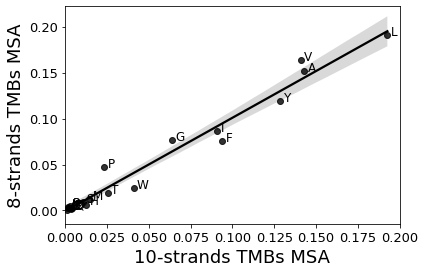

In [36]:
ax = sns.regplot(x=x_buried, y=y_buried,color="black");
ax.set_xlabel('10-strands TMBs MSA', size=18)
ax.set_ylabel('8-strands TMBs MSA',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.set_xlim([0,0.20])
for i, txt in enumerate(l_buried):
    ax.annotate(txt, (x_buried[i]+0.002, y_buried[i]),size=12)

In [27]:
# Calculate the amino acid frequencies on the cis lipid/water boundary

aa_dict_rim_Y10 = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
n_resi = 0

with open("10_strands.msa", 'r') as in_f:
    for line in in_f:
        if line[0] == ">":
            pass
        else:
            line = line.rstrip()
            strands = line.split(" ")
            strand_num = 1
            for strand in strands[1:]:
                if "-" in strand or "X" in strand:
                    pass
                else:
#                    if strand_num %2 != 0:
#                        n_resi += 1
#                        aa_dict_rim_Y[strand[0]] = aa_dict_rim_Y[strand[0]] + 1
                    if strand_num %2 == 0:
                        n_resi += 1
                        aa_dict_rim_Y10[strand[-3]] = aa_dict_rim_Y10[strand[-3]] + 1
                strand_num += 1

for key in aa_dict_rim_Y10:    
    aa_dict_rim_Y10[key] = aa_dict_rim_Y10[key]/n_resi

print(aa_dict_rim_Y10)


{'A': 0.035835187155430895, 'C': 0.001789341328948641, 'D': 0.010687687397233775, 'E': 0.009720475868072348, 'F': 0.05972531192571815, 'G': 0.017651610407196053, 'H': 0.07374987909855886, 'I': 0.028194216075055616, 'K': 0.019440951736144695, 'L': 0.04874746106973595, 'M': 0.008849985491827063, 'N': 0.011509817197020988, 'P': 0.0071090047393364926, 'Q': 0.03656059580230196, 'R': 0.026356514169648904, 'S': 0.008559822033078633, 'T': 0.021085211335719122, 'V': 0.04168681690685753, 'W': 0.06141793210175065, 'Y': 0.47132217816036365}


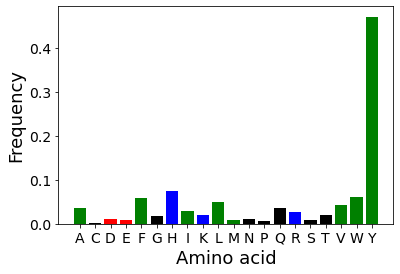

In [28]:
fig, ax = plt.subplots()
ax.bar(range(len(aa_dict_rim_Y10)), list(aa_dict_rim_Y10.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])

#plt.bar(range(len(aa_dict_rim_Y)), list(aa_dict_rim_Y.values()))
plt.xticks(range(len(aa_dict_rim_Y10)), list(aa_dict_rim_Y10.keys()), size=14)
plt.yticks(size=14)
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

In [29]:
# Calculate the amino acid frequencies on the cis lipid/water boundary

aa_dict_rim_trans10 = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
n_resi = 0

with open("10_strands.msa", 'r') as in_f:
    for line in in_f:
        if line[0] == ">":
            pass
        else:
            line = line.rstrip()
            strands = line.split(" ")
            strand_num = 1
            for strand in strands[1:]:
                if "-" in strand or "X" in strand:
                    pass
                else:
#                    if strand_num %2 == 0:
#                        n_resi += 1
#                        aa_dict_rim_trans[strand[0]] = aa_dict_rim_trans[strand[0]] + 1
                    if strand_num %2 != 0:
                        n_resi += 1
                        aa_dict_rim_trans10[strand[-1]] = aa_dict_rim_trans10[strand[-1]] + 1
                strand_num += 1

for key in aa_dict_rim_trans10:    
    aa_dict_rim_trans10[key] = aa_dict_rim_trans10[key]/n_resi

print(aa_dict_rim_trans10)


{'A': 0.09463646045115694, 'C': 0.0007745183464033305, 'D': 0.017378255397424727, 'E': 0.010020331106593087, 'F': 0.08040468583599573, 'G': 0.04985961854971439, 'H': 0.03039984509633072, 'I': 0.06128376415916352, 'K': 0.011714589989350373, 'L': 0.06360731919837351, 'M': 0.009923516313292672, 'N': 0.013021589698905992, 'P': 0.00943944234679059, 'Q': 0.014715848581663278, 'R': 0.03393358505179592, 'S': 0.0861167586407203, 'T': 0.03059347468293155, 'V': 0.07822635298673637, 'W': 0.027931067867170103, 'Y': 0.27601897569948686}


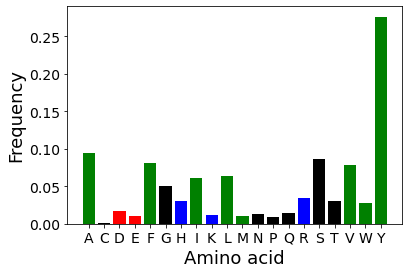

In [30]:
fig, ax = plt.subplots()
ax.bar(range(len(aa_dict_rim_trans10)), list(aa_dict_rim_trans10.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])

#plt.bar(range(len(aa_dict_rim_trans)), list(aa_dict_rim_trans.values()))
plt.xticks(range(len(aa_dict_rim_trans10)), list(aa_dict_rim_trans10.keys()),size=14)
plt.yticks(size=14)
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

# 12-strands beta-barrels statistics

In [31]:
# First, calculate the general amino acid frequencies on the surface of 10-strands beta-barrels

aa_dict_surf12 = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
n_resi = 0

for file in glob.glob("12_strands.msa"):
    with open(file, 'r') as in_f:
        for line in in_f:
            if line[0] == ">":
                pass
            else:
                line = line.rstrip()
                strands = line.split(" ")
                for strand in strands[1:]:
                    if "-" in strand or "X" in strand:
                        pass
                    else:
                        for pos in range(0,len(strand),2):
                            n_resi += 1
                            aa_dict_surf12[strand[pos]] = aa_dict_surf12[strand[pos]] + 1

for key in aa_dict_surf12:    
    aa_dict_surf12[key] = aa_dict_surf12[key]/n_resi

print(aa_dict_surf12)



{'A': 0.11646988801217442, 'C': 0.0007932593546261532, 'D': 0.010411406461582812, 'E': 0.004490887322852635, 'F': 0.0855641505604294, 'G': 0.07599110843531799, 'H': 0.019509865734235562, 'I': 0.0707706970582727, 'K': 0.01096541330381245, 'L': 0.1828232384788639, 'M': 0.019677538601529845, 'N': 0.01652901476011504, 'P': 0.029547685280969717, 'Q': 0.015129779779828855, 'R': 0.015298433190206727, 'S': 0.027118880062911643, 'T': 0.04331156854535453, 'V': 0.12188444691977099, 'W': 0.046709150330001774, 'Y': 0.08700358780714286}


In [32]:
# Second, calculate the general amino acid frequencies in the core of 10-strands beta-barrels

aa_dict_core12 = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
n_resi = 0

for file in glob.glob("12_strands.msa"):
    with open(file, 'r') as in_f:
        for line in in_f:
            if line[0] == ">":
                pass
            else:
                line = line.rstrip()
                strands = line.split(" ")
                for strand in strands[1:]:
                    if "-" in strand or "X" in strand:
                        pass
                    else:
                        for pos in range(1,len(strand)-1,2):
                            n_resi += 1
                            aa_dict_core12[strand[pos]] = aa_dict_core12[strand[pos]] + 1

for key in aa_dict_core12:    
    aa_dict_core12[key] = aa_dict_core12[key]/n_resi

print(aa_dict_core12)


{'A': 0.0654932022121937, 'C': 0.0003935060797283738, 'D': 0.05185007299478337, 'E': 0.05760762569606589, 'F': 0.03418985301180756, 'G': 0.1692801335305223, 'H': 0.01691125070735987, 'I': 0.024605423964163604, 'K': 0.0345583934490154, 'L': 0.033046188816343226, 'M': 0.015131557047682, 'N': 0.05488399298108793, 'P': 0.012153512547018627, 'Q': 0.0638490363261987, 'R': 0.07920171763620541, 'S': 0.10312236969123445, 'T': 0.07597877207081682, 'V': 0.03522652159646962, 'W': 0.02044448354407506, 'Y': 0.0520723860972281}


In [33]:
# Third, calculate the amino acid frequencies on lipid/water boundary of 10-strands beta-barrels

aa_dict_rim12 = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
n_resi = 0

for file in glob.glob("12_strands.msa"):
    with open(file, 'r') as in_f:
        for line in in_f:
            if line[0] == ">":
                pass
            else:
                line = line.rstrip()
                strands = line.split(" ")
                for strand in strands[1:]:
                    if "-" in strand or "X" in strand:
                        pass
                    else:
                        for pos in (0,-1):
                            n_resi += 1
                            aa_dict_rim12[strand[pos]] = aa_dict_rim12[strand[pos]] + 1

for key in aa_dict_rim12:    
    aa_dict_rim12[key] = aa_dict_rim12[key]/n_resi

print(aa_dict_rim12)


{'A': 0.0579924672751795, 'C': 0.001127670171864769, 'D': 0.024861909372254277, 'E': 0.009382327757475361, 'F': 0.09781069691695535, 'G': 0.05250242043349544, 'H': 0.036955682282426815, 'I': 0.05442197809577641, 'K': 0.01885699575234908, 'L': 0.1464991857269975, 'M': 0.017214458802263174, 'N': 0.03651916479654368, 'P': 0.025399161662571983, 'Q': 0.03023443227543134, 'R': 0.02861987721546615, 'S': 0.03951602522847213, 'T': 0.06092776754884239, 'V': 0.07894250840855799, 'W': 0.07723561311119444, 'Y': 0.10497965716588224}


In [34]:
# Forth, calculate the amino acid frequencies of surface residues buried in the membrane

aa_dict_buried12 = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
n_resi = 0

for file in glob.glob("12_strands.msa"):
    with open(file, 'r') as in_f:
        for line in in_f:
            if line[0] == ">":
                pass
            else:
                line = line.rstrip()
                strands = line.split(" ")
                for strand in strands:
                    if "-" in strand or "X" in strand:
                        pass
                    else:
                        for pos in range(2,len(strand)-2,2):
                            n_resi += 1
                            aa_dict_buried12[strand[pos]] = aa_dict_buried12[strand[pos]] + 1

for key in aa_dict_buried12:    
    aa_dict_buried12[key] = aa_dict_buried12[key]/n_resi

print(aa_dict_buried12)

{'A': 0.14804617272657286, 'C': 0.0006128588658488171, 'D': 0.00261748096892081, 'E': 0.0018597096618860657, 'F': 0.0789667139141605, 'G': 0.08866226193225646, 'H': 0.010029148533742711, 'I': 0.07962787692707131, 'K': 0.006576911523407133, 'L': 0.20247739894244107, 'M': 0.021015322981150816, 'N': 0.005745174491183738, 'P': 0.03188677507928673, 'Q': 0.006939192626371951, 'R': 0.008074340082328381, 'S': 0.02043567321640711, 'T': 0.03380686492500026, 'V': 0.14513886687528021, 'W': 0.03023688655620112, 'Y': 0.07724436917048194}


In [35]:
# Finally, get overall distributions to compare to values previously reported in litterature 

aa_dict_tot12 = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
n_resi = 0

for file in glob.glob("12_strands.msa"):
    with open(file, 'r') as in_f:
        for line in in_f:
            if line[0] == ">":
                pass
            else:
                line = line.rstrip()
                strands = line.split(" ")
                for strand in strands:
                    if "-" in strand or "X" in strand:
                        pass
                    else:
                        for pos in range(0,len(strand)):
                            n_resi += 1
                            aa_dict_tot12[strand[pos]] = aa_dict_tot12[strand[pos]] + 1

for key in aa_dict_tot12:    
    aa_dict_tot12[key] = aa_dict_tot12[key]/n_resi

print(aa_dict_tot12)

{'A': 0.09342860596618001, 'C': 0.0006124669254428969, 'D': 0.029136770848723355, 'E': 0.028496904087142224, 'F': 0.06234053698306314, 'G': 0.11813627389091104, 'H': 0.018334251138302015, 'I': 0.049913905416840154, 'K': 0.02162760399178005, 'L': 0.11513142519441795, 'M': 0.017623467153774865, 'N': 0.03385921319490148, 'P': 0.021717862275529527, 'Q': 0.037143970021355756, 'R': 0.044174982875102416, 'S': 0.06146266772326166, 'T': 0.05806938605563241, 'V': 0.08275556391280404, 'W': 0.03483163875196433, 'Y': 0.07120250359287067}


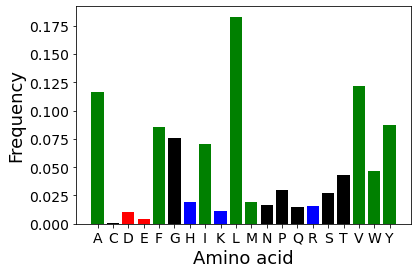

In [36]:
fig, ax = plt.subplots()
ax.bar(range(len(aa_dict_surf12)), list(aa_dict_surf12.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(aa_dict_surf12)), list(aa_dict_surf12.keys()),size=14)
plt.yticks(size=14)
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
plt.show()

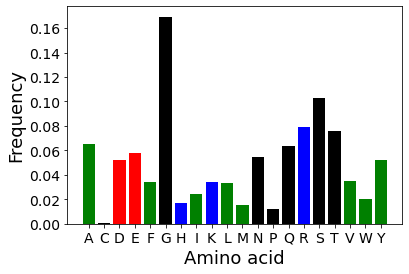

In [37]:
fig, ax = plt.subplots()
ax.bar(range(len(aa_dict_core12)), list(aa_dict_core12.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(aa_dict_core12)), list(aa_dict_core12.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

In [38]:
x = list()
y = list()
l = list()

for key in aa_dict_tot:
    y.append(aa_dict_tot[key])
    x.append(aa_dict_tot12[key])
    l.append(key)
print(y)
print(x)

[0.09673410009073352, 0.0009478865172013524, 0.02563855617114674, 0.02978999498177726, 0.08090794349177062, 0.1432809038883623, 0.0128861877220817, 0.053553053765948065, 0.01846604589392795, 0.11176342374582449, 0.01767022673242735, 0.02633502466025618, 0.02996233798490478, 0.022701628641379555, 0.03787288182845788, 0.044580065997232375, 0.04282926384193105, 0.09103968451092603, 0.027519122469979368, 0.08552166706373143]
[0.09342860596618001, 0.0006124669254428969, 0.029136770848723355, 0.028496904087142224, 0.06234053698306314, 0.11813627389091104, 0.018334251138302015, 0.049913905416840154, 0.02162760399178005, 0.11513142519441795, 0.017623467153774865, 0.03385921319490148, 0.021717862275529527, 0.037143970021355756, 0.044174982875102416, 0.06146266772326166, 0.05806938605563241, 0.08275556391280404, 0.03483163875196433, 0.07120250359287067]


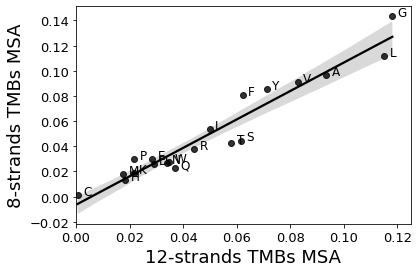

In [45]:
ax = sns.regplot(x=x, y=y,color="black");
ax.set_xlabel('12-strands TMBs MSA', size=18)
ax.set_ylabel('8-strands TMBs MSA',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.set_xlim([0,0.125])
for i, txt in enumerate(l):
    ax.annotate(txt, (x[i]+0.002, y[i]),size=12)

In [40]:
x_surf = list()
y_surf = list()
l_surf = list()

for key in aa_dict_surf:
    y_surf.append(aa_dict_surf[key])
    x_surf.append(aa_dict_surf12[key])
    l_surf.append(key)
print(y_surf)
print(x_surf)

[0.11995082543027749, 0.000820144522764552, 0.0072866686445619815, 0.0021825051749243796, 0.11560627606644364, 0.06515289471799646, 0.00836513311576485, 0.08131195842327642, 0.006255946474060585, 0.17592270521516432, 0.013103556460385826, 0.007521117442649561, 0.040410447379459216, 0.005143380359499524, 0.0076822477075170256, 0.010963678339659189, 0.02333660709109572, 0.14541878523126028, 0.0439160963166815, 0.11964902588655747]
[0.11646988801217442, 0.0007932593546261532, 0.010411406461582812, 0.004490887322852635, 0.0855641505604294, 0.07599110843531799, 0.019509865734235562, 0.0707706970582727, 0.01096541330381245, 0.1828232384788639, 0.019677538601529845, 0.01652901476011504, 0.029547685280969717, 0.015129779779828855, 0.015298433190206727, 0.027118880062911643, 0.04331156854535453, 0.12188444691977099, 0.046709150330001774, 0.08700358780714286]


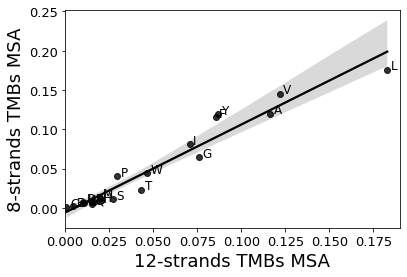

In [46]:
ax = sns.regplot(x=x_surf, y=y_surf,color="black");
ax.set_xlabel('12-strands TMBs MSA', size=18)
ax.set_ylabel('8-strands TMBs MSA',size=18)
ax.set_xlim([0,0.19])
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for i, txt in enumerate(l_surf):
    ax.annotate(txt, (x_surf[i]+0.002, y_surf[i]),size=12)

In [42]:
x_core = list()
y_core = list()
l_core = list()

for key in aa_dict_core:
    y_core.append(aa_dict_core[key])
    x_core.append(aa_dict_core12[key])
    l_core.append(key)
print(y_core)
print(x_core)

[0.07307786630111489, 0.000560694380689476, 0.0529505100746824, 0.06357016644762904, 0.03465929694164796, 0.24388319111608575, 0.014590630220483895, 0.01795479650462075, 0.036906266571925035, 0.033595549658657645, 0.022868994543972065, 0.04843456224965258, 0.010193109432870735, 0.04258971634104471, 0.07494859428154613, 0.07878122858095064, 0.06227166114356501, 0.027519089809615437, 0.0037320237189443434, 0.056912051680301494]
[0.0654932022121937, 0.0003935060797283738, 0.05185007299478337, 0.05760762569606589, 0.03418985301180756, 0.1692801335305223, 0.01691125070735987, 0.024605423964163604, 0.0345583934490154, 0.033046188816343226, 0.015131557047682, 0.05488399298108793, 0.012153512547018627, 0.0638490363261987, 0.07920171763620541, 0.10312236969123445, 0.07597877207081682, 0.03522652159646962, 0.02044448354407506, 0.0520723860972281]


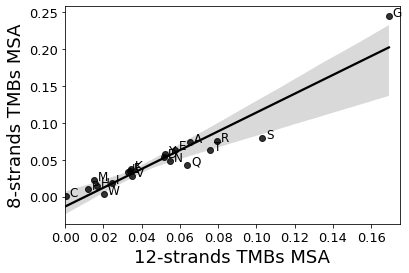

In [49]:
ax = sns.regplot(x=x_core, y=y_core,color="black");
ax.set_xlabel('12-strands TMBs MSA', size=18)
ax.set_ylabel('8-strands TMBs MSA',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.set_xlim([0,0.175])
for i, txt in enumerate(l_core):
    ax.annotate(txt, (x_core[i]+0.002, y_core[i]),size=12)

In [50]:
x_rim = list()
y_rim = list()
l_rim = list()

for key in aa_dict_rim:
    y_rim.append(aa_dict_rim[key])
    x_rim.append(aa_dict_rim12[key])
    l_rim.append(key)
print(y_rim)
print(x_rim)

[0.05463001051236346, 0.0010215274921157274, 0.01702545820192879, 0.004451757392933863, 0.19393025275378217, 0.039732163261575026, 0.01522921522921523, 0.07771836007130124, 0.01228575346222405, 0.14535856300562183, 0.013848896201837378, 0.017461949814890992, 0.04733534439416792, 0.010957996252113899, 0.015297774121303533, 0.017925864984688514, 0.03165592577357283, 0.10146258969788381, 0.08296083001965356, 0.09970976735682618]
[0.0579924672751795, 0.001127670171864769, 0.024861909372254277, 0.009382327757475361, 0.09781069691695535, 0.05250242043349544, 0.036955682282426815, 0.05442197809577641, 0.01885699575234908, 0.1464991857269975, 0.017214458802263174, 0.03651916479654368, 0.025399161662571983, 0.03023443227543134, 0.02861987721546615, 0.03951602522847213, 0.06092776754884239, 0.07894250840855799, 0.07723561311119444, 0.10497965716588224]


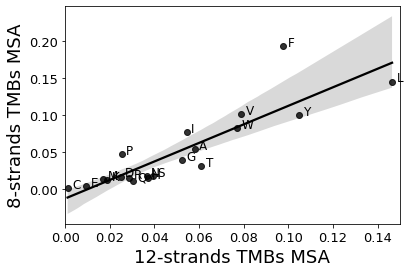

In [52]:
ax = sns.regplot(x=x_rim, y=y_rim,color="black");
ax.set_xlabel('12-strands TMBs MSA', size=18)
ax.set_ylabel('8-strands TMBs MSA',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.set_xlim([0,0.15])
for i, txt in enumerate(l_rim):
    ax.annotate(txt, (x_rim[i]+0.002, y_rim[i]),size=12)

In [53]:
x_buried = list()
y_buried = list()
l_buried = list()

for key in aa_dict_buried:
    y_buried.append(aa_dict_buried[key])
    x_buried.append(aa_dict_buried12[key])
    l_buried.append(key)
print(y_buried)
print(x_buried)

[0.15881906595737738, 0.0007003143935685301, 0.0014917376499896653, 0.0008322182696387194, 0.06900068535622206, 0.0802791466771102, 0.004280756720298511, 0.0834502790378904, 0.002667993864430012, 0.1941094720581356, 0.012660052435190323, 0.0016059636869989013, 0.03628988392458906, 0.0016834742121123113, 0.003150734854171426, 0.006820926209980092, 0.018386312457165235, 0.17157430675674207, 0.020683071701315232, 0.1315136037770743]
[0.14804617272657286, 0.0006128588658488171, 0.00261748096892081, 0.0018597096618860657, 0.0789667139141605, 0.08866226193225646, 0.010029148533742711, 0.07962787692707131, 0.006576911523407133, 0.20247739894244107, 0.021015322981150816, 0.005745174491183738, 0.03188677507928673, 0.006939192626371951, 0.008074340082328381, 0.02043567321640711, 0.03380686492500026, 0.14513886687528021, 0.03023688655620112, 0.07724436917048194]


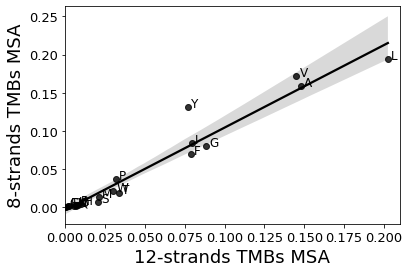

In [57]:
ax = sns.regplot(x=x_buried, y=y_buried,color="black");
ax.set_xlabel('12-strands TMBs MSA', size=18)
ax.set_ylabel('8-strands TMBs MSA',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.set_xlim([0,0.21])
for i, txt in enumerate(l_buried):
    ax.annotate(txt, (x_buried[i]+0.002, y_buried[i]),size=12)

In [58]:
# Calculate the amino acid frequencies on the cis lipid/water boundary

aa_dict_rim_Y12 = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
n_resi = 0

with open("12_strands.msa", 'r') as in_f:
    for line in in_f:
        if line[0] == ">":
            pass
        else:
            line = line.rstrip()
            strands = line.split(" ")
            strand_num = 1
            for strand in strands[1:]:
                if "-" in strand or "X" in strand:
                    pass
                else:
#                    if strand_num %2 != 0:
#                        n_resi += 1
#                        aa_dict_rim_Y[strand[0]] = aa_dict_rim_Y[strand[0]] + 1
                    if strand_num %2 == 0:
                        n_resi += 1
                        aa_dict_rim_Y12[strand[-3]] = aa_dict_rim_Y12[strand[-3]] + 1
                strand_num += 1

for key in aa_dict_rim_Y12:    
    aa_dict_rim_Y12[key] = aa_dict_rim_Y12[key]/n_resi

print(aa_dict_rim_Y12)

{'A': 0.08551257604649051, 'C': 0.001055570689185508, 'D': 0.0019749387087986923, 'E': 0.0024062471624443837, 'F': 0.08325388177608281, 'G': 0.05593389630436756, 'H': 0.035866702987378554, 'I': 0.06585399073821847, 'K': 0.030532098429129212, 'L': 0.10829247253246163, 'M': 0.027251884136929083, 'N': 0.0052778534459275404, 'P': 0.0028035049486969943, 'Q': 0.017411241260328704, 'R': 0.03349450649232725, 'S': 0.022348588032325433, 'T': 0.028477708163079995, 'V': 0.08034822482520658, 'W': 0.08830473077272315, 'Y': 0.22359938254789793}


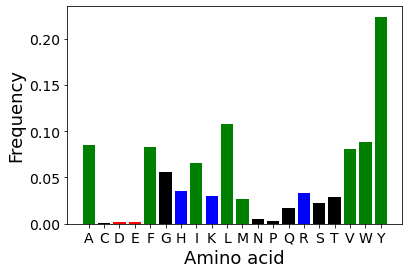

In [59]:
fig, ax = plt.subplots()
ax.bar(range(len(aa_dict_rim_Y12)), list(aa_dict_rim_Y12.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])

#plt.bar(range(len(aa_dict_rim_Y)), list(aa_dict_rim_Y.values()))
plt.xticks(range(len(aa_dict_rim_Y12)), list(aa_dict_rim_Y12.keys()), size=14)
plt.yticks(size=14)
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

In [60]:
# Calculate the amino acid frequencies on the cis lipid/water boundary

aa_dict_rim_trans12 = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
n_resi = 0

with open("12_strands.msa", 'r') as in_f:
    for line in in_f:
        if line[0] == ">":
            pass
        else:
            line = line.rstrip()
            strands = line.split(" ")
            strand_num = 1
            for strand in strands[1:]:
                if "-" in strand or "X" in strand:
                    pass
                else:
#                    if strand_num %2 == 0:
#                        n_resi += 1
#                        aa_dict_rim_trans[strand[0]] = aa_dict_rim_trans[strand[0]] + 1
                    if strand_num %2 != 0:
                        n_resi += 1
                        aa_dict_rim_trans12[strand[-1]] = aa_dict_rim_trans12[strand[-1]] + 1
                strand_num += 1

for key in aa_dict_rim_trans12:    
    aa_dict_rim_trans12[key] = aa_dict_rim_trans12[key]/n_resi

print(aa_dict_rim_trans12)


{'A': 0.0692403651899363, 'C': 0.0009935639137586523, 'D': 0.014693706324586291, 'E': 0.009273263195080754, 'F': 0.06292571453804797, 'G': 0.08554585297461996, 'H': 0.08222293366304936, 'I': 0.039278893390592054, 'K': 0.025236523409469767, 'L': 0.07256328450150691, 'M': 0.012783855690361326, 'N': 0.025898899351975535, 'P': 0.007341333362772264, 'Q': 0.04623384078690262, 'R': 0.048419681397171656, 'S': 0.03298632193678726, 'T': 0.034796816179636356, 'V': 0.060463883951734874, 'W': 0.052714085424417384, 'Y': 0.2163871808175927}


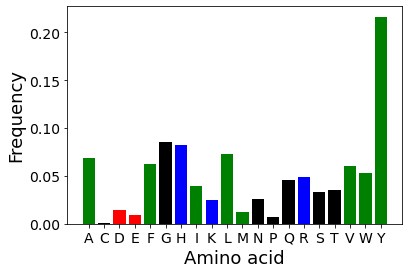

In [61]:
fig, ax = plt.subplots()
ax.bar(range(len(aa_dict_rim_trans12)), list(aa_dict_rim_trans12.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])

#plt.bar(range(len(aa_dict_rim_trans)), list(aa_dict_rim_trans.values()))
plt.xticks(range(len(aa_dict_rim_trans12)), list(aa_dict_rim_trans12.keys()),size=14)
plt.yticks(size=14)
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()